# PARK REVIEWS

In [1]:
# Load All

import os
import glob
import pandas as pd

# Path
path = 'GoogleReviews-20240420T223639Z-001/GoogleReviews' 
# Get all .csv files at the path
all_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize a list
dataframes = []

# Define a function to standardize column names and handle special cases
def standardize_columns(df, filename):
    # Rename columns to create a consistent schema
    column_renames = {
        'author_id': 'user_id',
        'author_title': 'author',
        'review_datetime_utc': 'timestamp',
    }
    df.rename(columns={old: new for old, new in column_renames.items() if old in df.columns}, inplace=True)

    # Check if 'rating' column exists; if it does, this is a special case file
    if 'rating' in df.columns and 'review_text' in df.columns:
        df['rating'], df['review_text'] = df['review_text'], df['rating']

    # Combine 'rating' and 'review_rating' into one column
    if 'rating' in df.columns and 'review_rating' in df.columns:
        df['rating'] = df['rating'].fillna(df['review_rating'])
        df.drop(columns=['review_rating'], inplace=True, errors='ignore')
    elif 'review_rating' in df.columns:
        df.rename(columns={'review_rating': 'rating'}, inplace=True)
        
    # Add missing columns with NaNs
    desired_columns = ['user_id', 'author', 'timestamp', 'rating', 'review_text']
    for col in desired_columns:
        if col not in df.columns:
            df[col] = pd.NA

    # Add the filename as a new column
    df['file_name'] = filename.split('/')[-1]  # Get just the file name

    return df

# Process each file
for filename in all_files:
    df = pd.read_csv(filename)
    df = standardize_columns(df, filename)
    dataframes.append(df)

# Concatenate all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

In [2]:
combined_df.head()

,timestamp,author,user_id,review_text,rating,file_name
0,10/10/2023 17:22:56,Joshuan Baez,116670582246589373320,NaN,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...
1,05/13/2022 07:16:35,Psychotina,106649515210089079403,I hate being at Baldis schoolhouse he keep sma...,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...
2,04/06/2022 16:01:30,Vinsu Varughese,106956709800850981360,NaN,3,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...
3,03/28/2022 04:50:26,Regular Item Review,105056063043386543127,NaN,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...
4,10/03/2021 23:15:56,M Quinn,113168579491238317870,NaN,1,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...


In [3]:
def extract_place_id(file_name):
    return file_name.split('\\')[-1][:27]

combined_df['place_id'] = combined_df['file_name'].apply(extract_place_id)

In [4]:
combined_df.head()

,timestamp,author,user_id,review_text,rating,file_name,place_id
0,10/10/2023 17:22:56,Joshuan Baez,116670582246589373320,NaN,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY
1,05/13/2022 07:16:35,Psychotina,106649515210089079403,I hate being at Baldis schoolhouse he keep sma...,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY
2,04/06/2022 16:01:30,Vinsu Varughese,106956709800850981360,NaN,3,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY
3,03/28/2022 04:50:26,Regular Item Review,105056063043386543127,NaN,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY
4,10/03/2021 23:15:56,M Quinn,113168579491238317870,NaN,1,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY


In [7]:
combined_df.to_csv('output_files/combined_reviews.csv', index=False)

In [8]:
ppr_df = pd.read_csv('data/PPR-parks-April17.csv')

In [9]:
ppr_df.head()

,objectID,type,ParkName,GoogleID,Lat,Long,NumberRatings,inPhilly,Notes,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,113.0,Point,John F Kennedy Plaza (LOVE Park),ChIJkydYBi7GxokRB1nllBaz4zk,39.954132,-75.165640,14634,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,107.0,Point,Rittenhouse Square,ChIJIQGrHTrGxokRofc6nBBJrRU,39.949462,-75.171892,6465,1,no google ID here,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,204.0,Point,Wissahickon Valley Park,ChIJIcPcqf64xokRSPxypSWNWic,40.056211,-75.217331,6252,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,146.0,Point,East Fairmount Park,ChIJ9yn9mbzHxokR1TbHNCkX9E4,39.984455,-75.197028,5222,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23.0,Point,Franklin Delano Roosevelt Park,ChIJie9v2DbBxokRHylCIW7ceSA,39.902140,-75.183810,4338,1,should also consider\n\t\nChIJjQO6UDTFxokRKwip...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Same Google ID as Pleasant Hill - no duplication

ppr_df = ppr_df[ppr_df['ParkName'] != 'Fish Hatchery at Pleasant Hill Park']

In [11]:
combined_df= combined_df.merge(ppr_df[['GoogleID', 'ParkName', 'Lat', 'Long']], 
                                left_on='place_id', 
                                right_on='GoogleID', 
                                how='left')

# Drop the now redundant 'GoogleID' column
combined_df.drop('GoogleID', axis=1, inplace=True)

combined_df.to_csv('output_files/combined_reviews_with_park_info.csv', index=False)

In [12]:
combined_df.head()

,timestamp,author,user_id,review_text,rating,file_name,place_id,ParkName,Lat,Long
0,10/10/2023 17:22:56,Joshuan Baez,116670582246589373320,NaN,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY,CCA Baldi School Playground,40.092014,-75.05062
1,05/13/2022 07:16:35,Psychotina,106649515210089079403,I hate being at Baldis schoolhouse he keep sma...,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY,CCA Baldi School Playground,40.092014,-75.05062
2,04/06/2022 16:01:30,Vinsu Varughese,106956709800850981360,NaN,3,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY,CCA Baldi School Playground,40.092014,-75.05062
3,03/28/2022 04:50:26,Regular Item Review,105056063043386543127,NaN,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY,CCA Baldi School Playground,40.092014,-75.05062
4,10/03/2021 23:15:56,M Quinn,113168579491238317870,NaN,1,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY,CCA Baldi School Playground,40.092014,-75.05062


In [13]:
FDR = "Franklin Delano Roosevelt Park"

# Create a list of place_ids to update based on the second image
FDR_place_ids_to_update = [
    'ChIJjQO6UDTFxokRKwipjcz5Q5o',
    'ChIJB37Luk_FxokRSxEC_QgGmAU',
    'ChIJm1IODzjFxokREo4XLuKy_WQ',
    'ChIJa8NFISXFxokRyfcKW9fOUTU',
    'ChIJQ0ZFt63FxokRqkfAi0r4wPQ',
    'ChIJobR0mq63xokRiBpks2cGAo0',
    'ChIJZTP18zXFxokRZSENwg8ci8o']

for pid in FDR_place_ids_to_update:
    combined_df.loc[combined_df['place_id'] == pid, 'ParkName'] = FDR

In [14]:
len(combined_df[combined_df['ParkName'] == 'Franklin Delano Roosevelt Park'])

## orginal 4338, should worked

4362

In [15]:
Tacony = "Tacony Creek Park"

# Create a list of place_ids to update based on the second image
Tacony_place_ids_to_update = [
    'ChIJcf8po0u2xokRjKskdO6gjg4',
    'ChIJ26qgUku2xokRWu2KHZAoxso',
    'ChIJd_QXFbK3xokR6p-tgQG1jsA',
    'ChIJp-fcuq63xokReHv464Y-4jw',
    'ChIJpRYFA0u2xokRqCSGUUT3NTc',
    'ChIJobR0mq63xokRiBpks2cGAo0',
    'ChIJ_UE-k022xokRkn8Tn8lEZo0']

for pid in Tacony_place_ids_to_update:
    combined_df.loc[combined_df['place_id'] == pid, 'ParkName'] = Tacony

In [16]:
len(combined_df[combined_df['ParkName'] == 'Tacony Creek Park'])

## originally 1759

2260

In [17]:
len(combined_df)

82850

In [18]:
combined_df.head()

,timestamp,author,user_id,review_text,rating,file_name,place_id,ParkName,Lat,Long
0,10/10/2023 17:22:56,Joshuan Baez,116670582246589373320,NaN,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY,CCA Baldi School Playground,40.092014,-75.05062
1,05/13/2022 07:16:35,Psychotina,106649515210089079403,I hate being at Baldis schoolhouse he keep sma...,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY,CCA Baldi School Playground,40.092014,-75.05062
2,04/06/2022 16:01:30,Vinsu Varughese,106956709800850981360,NaN,3,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY,CCA Baldi School Playground,40.092014,-75.05062
3,03/28/2022 04:50:26,Regular Item Review,105056063043386543127,NaN,5,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY,CCA Baldi School Playground,40.092014,-75.05062
4,10/03/2021 23:15:56,M Quinn,113168579491238317870,NaN,1,ChIJgbQKI9uzxokR-qVMyL3_iYY_CCA_Baldi_School_P...,ChIJgbQKI9uzxokR-qVMyL3_iYY,CCA Baldi School Playground,40.092014,-75.05062


In [19]:
len(combined_df['ParkName'].unique())

## Merged some park names to the larger parks but lat and long and place-id was original

163

In [21]:
combined_df.to_csv('output_files/processing/combined_reviews_with_park_info.csv', index=False)

## **Filter: parks with over 25 comments**

In [22]:
combined_df = combined_df.drop('file_name', axis=1)

combined_df = combined_df.groupby('ParkName').filter(lambda x: x['review_text'].count() >= 25)


combined_df.head()

,timestamp,author,user_id,review_text,rating,place_id,ParkName,Lat,Long
30,04/10/2024 01:50:19,tyree reaves,108090394354704972010,NaN,4,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
31,10/05/2023 23:03:18,Edson Matute,115156681408051985266,Es un buen lugar para niños de 6 años para aba...,4,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
32,08/05/2023 05:02:57,Megan Fox,109307441981026484611,A nice park in South Center City! Enjoy the ev...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
33,07/31/2023 23:06:09,irma zamora,114382657812728238241,NaN,5,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
34,06/18/2023 02:49:15,BeatsByTheKilo DotCom,108466939820402781198,NaN,5,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268


In [23]:
len(combined_df['ParkName'].unique())

92

In [24]:
combined_df.head(50)

,timestamp,author,user_id,review_text,rating,place_id,ParkName,Lat,Long
30,04/10/2024 01:50:19,tyree reaves,108090394354704972010,NaN,4,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
31,10/05/2023 23:03:18,Edson Matute,115156681408051985266,Es un buen lugar para niños de 6 años para aba...,4,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
32,08/05/2023 05:02:57,Megan Fox,109307441981026484611,A nice park in South Center City! Enjoy the ev...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
33,07/31/2023 23:06:09,irma zamora,114382657812728238241,NaN,5,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
34,06/18/2023 02:49:15,BeatsByTheKilo DotCom,108466939820402781198,NaN,5,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
35,05/14/2023 20:06:10,ali rauf,101096784176786150599,NaN,5,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
36,09/21/2022 20:26:43,Jordan Davis,102697249474765273047,NaN,5,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
37,05/30/2022 03:02:34,Harriet Strong,110181439469374211925,Nice park. The toddlers had a great time. My f...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
38,05/17/2022 21:08:50,Shanya Speller,108359350325659270593,NaN,5,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268
39,05/08/2022 14:59:45,Abbystar Abby,110057502652457541188,NaN,5,ChIJHShWn2rGxokRKdH8EZ4e3To,Julian Abele Park,39.940884,-75.179268


## **Spatial Join and get Geometry**

In [25]:
import geopandas as gpd


# PPR data
park_df = gpd.read_file('data/PPR_Properties.geojson')
park_df = park_df.to_crs("EPSG:4326")

In [26]:
park_df.head()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length,geometry
0,1,William H (Billy) Markward Memorial Playground,Schuylkill River Park,Y,William H. (Billy) Markward Memorial Playground,Markward,Joseph O'Connor Memorial Pool,1903,400 S TANEY ST,19146,...,5;7,2,9;17,Y,Y,Y,Markward site includes the O'Connor Pool,25871.441406,1094.402639,"MULTIPOLYGON (((-75.18307 39.94826, -75.18314 ..."
1,2,Schuylkill Banks,Schuylkill Banks,N,None,Schuylkill Banks,None,2794,2425 CHESTNUT ST,19103,...,5;7,2;5,9;17,Y,Y,N,Bill 160113 (4/14/16) -South of South St Bridge,101477.171875,9300.670275,"POLYGON ((-75.18103 39.96361, -75.18075 39.963..."
2,3,Schuylkill River Park,Schuylkill River Park,N,None,Schuylkill River Park,None,2992,400 S TANEY ST,19146,...,"5, 7",2,9,Y,Y,N,None,27216.929688,799.048584,"POLYGON ((-75.18314 39.94821, -75.18307 39.948..."
3,4,Frankford Boat Launch,Frankford Boat Launch,N,Frankford Boat Launch,Frankford Launch,PA Fish & Boat;Frankford Arsenal Boat Launch,3090,5625 TACONY ST,19137,...,2,6,15,Y,Y,N,None,78515.335938,1585.376114,"POLYGON ((-75.05596 40.00750, -75.05601 40.007..."
4,5,Robert A Borski Park,Robert A Borski Park,N,Robert A. Borski Park,Borski,Orthodox Street Parcel; Bridesburg Riverfront ...,3091,3101 ORTHODOX ST,19137,...,2,6,15,Y,Y,N,Officially acquired from PAID in 10/2019. Doc ...,72926.187500,1304.901416,"POLYGON ((-75.06707 39.99007, -75.06713 39.990..."


In [27]:
combined_df = gpd.GeoDataFrame(
    combined_df, 
    geometry=gpd.points_from_xy(combined_df['Long'], combined_df['Lat']),
    crs="EPSG:4326" 
)

In [28]:
from geopandas.tools import sjoin

projected_crs = 'EPSG:3857'  
park_df = park_df.to_crs(projected_crs)
combined_df = combined_df.to_crs(projected_crs)
feet_to_meters = 100 / 3.281  # Convert 100 feet to meters
combined_df['buffered_geometry'] = combined_df.geometry.buffer(feet_to_meters)

# Make sure there are no columns named 'index_left' or 'index_right'
if 'index_left' in combined_df.columns:
    combined_df.drop(columns='index_left', inplace=True)
if 'index_right' in combined_df.columns:
    combined_df.drop(columns='index_right', inplace=True)
if 'index_left' in park_df.columns:
    park_df.drop(columns='index_left', inplace=True)
if 'index_right' in park_df.columns:
    park_df.drop(columns='index_right', inplace=True)

# Spatial join using the buffered points for intersection
joined_df = sjoin(combined_df.set_geometry('buffered_geometry'), park_df, how='left', predicate='intersects')
joined_df.drop(columns='buffered_geometry', inplace=True)
joined_df.set_geometry('geometry', inplace=True)

# Retain only the desired columns
desired_columns = ['ParkName', 'timestamp', 'author', 'user_id', 'review_text', 'rating', 'place_id', 'Long', 'Lat', 'geometry']
final_df = joined_df[desired_columns]

# Reproject to WGS 84
final_df = final_df.to_crs(epsg=4326)
final_df['geometry'] = final_df['geometry'].astype(str)  # Convert geometry to WKT for CSV compatibility


/var/folders/lv/8xb4hscx2hs0c0fwhd2bnjy80000gn/T/ipykernel_49677/3040295429.py:30: UserWarning: Geometry column does not contain geometry.
  final_df['geometry'] = final_df['geometry'].astype(str)  # Convert geometry to WKT for CSV compatibility


In [29]:
combined_df = final_df
combined_df.head()
combined_df.to_csv('output_files/processing/with_geometry.csv', index=False)

In [30]:
combined_df.head()

,ParkName,timestamp,author,user_id,review_text,rating,place_id,Long,Lat,geometry
30,Julian Abele Park,04/10/2024 01:50:19,tyree reaves,108090394354704972010,NaN,4,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884)
31,Julian Abele Park,10/05/2023 23:03:18,Edson Matute,115156681408051985266,Es un buen lugar para niños de 6 años para aba...,4,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884)
32,Julian Abele Park,08/05/2023 05:02:57,Megan Fox,109307441981026484611,A nice park in South Center City! Enjoy the ev...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884)
33,Julian Abele Park,07/31/2023 23:06:09,irma zamora,114382657812728238241,NaN,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884)
34,Julian Abele Park,06/18/2023 02:49:15,BeatsByTheKilo DotCom,108466939820402781198,NaN,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884)


# **Basic Exploration**

### *Changes of Review Amount over Month*

In [31]:
import pandas as pd
import geopandas as gpd

combined_df = pd.read_csv('output_files/processing/with_geometry.csv')

In [32]:
# Filter out rows with NaN 'review_text'
reviews_df = combined_df[combined_df['review_text'].notna()]

reviews_df.head()


,ParkName,timestamp,author,user_id,review_text,rating,place_id,Long,Lat,geometry
1,Julian Abele Park,10/05/2023 23:03:18,Edson Matute,115156681408051985266,Es un buen lugar para niños de 6 años para aba...,4,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884)
2,Julian Abele Park,08/05/2023 05:02:57,Megan Fox,109307441981026484611,A nice park in South Center City! Enjoy the ev...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884)
7,Julian Abele Park,05/30/2022 03:02:34,Harriet Strong,110181439469374211925,Nice park. The toddlers had a great time. My f...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884)
13,Julian Abele Park,10/19/2021 18:32:05,Luke Sondergaard,102520574167486358626,Sometimes it is simply nice to have a quiet fa...,4,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884)
14,Julian Abele Park,10/13/2021 17:46:22,Megan Wilcox,106253592949393170364,Update: it's randomly used! I saw someone te...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884)


In [33]:
# Convert the 'timestamp' column to datetime
reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'], errors='coerce')
# Filter out data before 2016
reviews_df = reviews_df[reviews_df['timestamp'].dt.year >= 2016]

/var/folders/lv/8xb4hscx2hs0c0fwhd2bnjy80000gn/T/ipykernel_49677/644511960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'], errors='coerce')


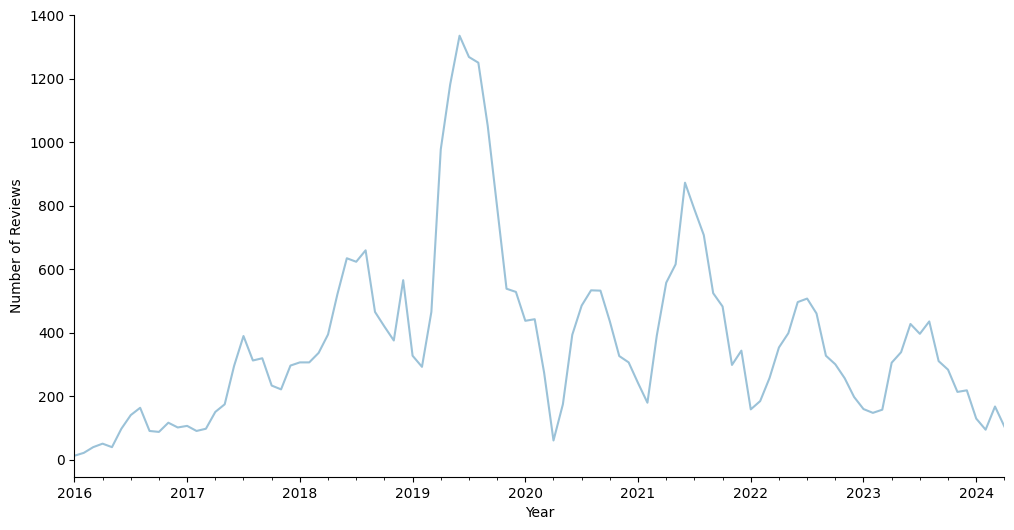

FileNotFoundError: [Errno 2] No such file or directory: 'output_files/charts/review_amounts_over_yearnmonths.png'

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by month and year
monthly_reviews = reviews_df.groupby(reviews_df['timestamp'].dt.to_period("M")).size()

fig, ax = plt.subplots(figsize=(12, 6))
monthly_reviews.plot(kind='line', ax=ax, color='#9BC2D8')  


plt.xticks(rotation=0) 

#plt.title('Total Number of Park Reviews per Month (From 2016 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
ax.grid(False)
#sns.despine(left=False, bottom=False, right=True, top=True)

sns.despine(left=False, bottom=False, right=True, top=True)
plt.show()
fig.savefig("output_files/charts/review_amounts_over_yearnmonths.png", dpi=300, bbox_inches="tight", transparent=False)

In [ ]:
# Map months to seasons
month_to_season = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                   6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 
                   11: 'Fall', 12: 'Winter'}

reviews_df['season'] = reviews_df['timestamp'].dt.month.map(month_to_season)

# Group by year and season
seasonal_reviews = reviews_df.groupby([reviews_df['timestamp'].dt.year, 'season']).size().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
colors = {'Spring': '#FADCD8', 'Summer': '#EDC02C', 'Fall': '#D47035', 'Winter': '#9CC4BC'}
seasonal_reviews.plot(kind='line', ax=ax, color=[colors[season] for season in seasonal_reviews.columns])

# Add a vertical dashed line at x = 2020
ax.axvline(x=2020, color='gray', linestyle=(0, (5, 5)), linewidth=1)

#plt.title('Total Number of Reviews per Trimester Since 2016')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(False)

#legend order
handles, labels = plt.gca().get_legend_handles_labels()
order = ["Spring", "Summer", "Fall", "Winter"]
order_map = {label: handle for label, handle in zip(labels, handles)}

plt.legend([order_map[label] for label in order], order, title="Seasons", loc='lower right', bbox_to_anchor=(1, 0.75), frameon=False)
#plt.legend( title="Seasons", loc='lower right', bbox_to_anchor=(1, 0.75), frameon=False)
sns.despine(left=False, bottom=False, right=True, top=True)
plt.show()
fig.savefig("output_files/charts/review_amounts_over_yearbyseason.png", dpi=300, bbox_inches="tight", transparent=False)

In [ ]:
# Mapping day of the week
reviews_df['day_of_week'] = reviews_df['timestamp'].dt.day_name()

# Group by day of the week and calculate the mean
weekday_reviews = reviews_df.groupby('day_of_week').size().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
weekday_reviews = weekday_reviews.iloc[::-1]
fig, ax = plt.subplots(figsize=(8, 6))
#weekday_reviews.plot(kind='barh', ax=ax, color='#9BC2D8')'

#value beside the bar
bars = weekday_reviews.plot(kind='barh', ax=ax, color='#9BC2D8')

# Change the color of Saturday and Sunday to a darker blue
for bar, day in zip(bars.patches, weekday_reviews.index):
    if day in ['Saturday', 'Sunday']:
        bar.set_color('#2C5F8A')  
ax.xaxis.set_visible(False)
for bar in bars.patches:
    ax.text(bar.get_width() + 50, 
            bar.get_y() + bar.get_height()/2, 
            f'{int(bar.get_width())}', 
            va='center') 

#plt.title('Average Number of Reviews by Day of the Week')
plt.ylabel('Day of the Week')
plt.xlabel('Average Number of Reviews')
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True, right=True, top=True) 
plt.grid(False)
plt.show()
fig.savefig("output_files/charts/review_amounts_by_weekday.png", dpi=300, bbox_inches="tight", transparent=False)

In [35]:
# Transform Date 

reviews_df.loc[:, 'time'] = pd.to_datetime(reviews_df['timestamp'])

# Create a dictionary to map month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

monthly_review_count = reviews_df.groupby(reviews_df['time'].dt.strftime('%b'))['review_text'].count()

# Ensure the monthly data is in the right order
monthly_review_count = monthly_review_count.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])



In [36]:
reviews_df.head()

,ParkName,timestamp,author,user_id,review_text,rating,place_id,Long,Lat,geometry,time
1,Julian Abele Park,2023-10-05 23:03:18,Edson Matute,115156681408051985266,Es un buen lugar para niños de 6 años para aba...,4,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2023-10-05 23:03:18
2,Julian Abele Park,2023-08-05 05:02:57,Megan Fox,109307441981026484611,A nice park in South Center City! Enjoy the ev...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2023-08-05 05:02:57
7,Julian Abele Park,2022-05-30 03:02:34,Harriet Strong,110181439469374211925,Nice park. The toddlers had a great time. My f...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2022-05-30 03:02:34
13,Julian Abele Park,2021-10-19 18:32:05,Luke Sondergaard,102520574167486358626,Sometimes it is simply nice to have a quiet fa...,4,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2021-10-19 18:32:05
14,Julian Abele Park,2021-10-13 17:46:22,Megan Wilcox,106253592949393170364,Update: it's randomly used! I saw someone te...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2021-10-13 17:46:22


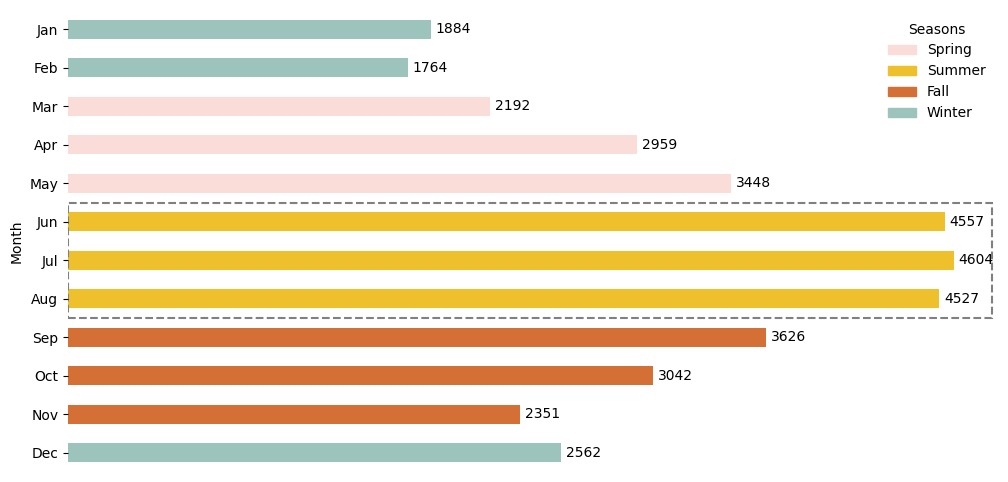

FileNotFoundError: [Errno 2] No such file or directory: 'output_files/charts/review_amounts_over_months.png'

In [37]:
# Ensure the monthly data is in the right order
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_review_count = monthly_review_count.reindex(ordered_months)
monthly_review_count = monthly_review_count.iloc[::-1]
# Define colors for the four seasons: Winter, Spring, Summer, Fall
season_colors = {
    'Jan': '#9CC4BC', 'Feb': '#9CC4BC', 'Mar': '#FADCD8',
    'Apr': '#FADCD8', 'May': '#FADCD8', 'Jun': '#EDC02C',
    'Jul': '#EDC02C', 'Aug': '#EDC02C', 'Sep': '#D47035',
    'Oct': '#D47035', 'Nov': '#D47035', 'Dec': '#9CC4BC'
}
# Generate the colors list corresponding to the reordered months
colors = [season_colors[month] for month in monthly_review_count.index]

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
bars = monthly_review_count.plot(kind='barh', color=colors, ax=ax)

# Remove the x-axis
ax.xaxis.set_visible(False)

# Add values at the end of each bar
for bar in bars.patches:
    ax.text(bar.get_width() +25,  
            bar.get_y() + bar.get_height()/2,  
            f'{int(bar.get_width())}',
            va='center') 

# Add a dashed box around the summer months (June, July, August)
summer_months = ['Jun', 'Jul', 'Aug']
summer_indices = [ordered_months.index(month) for month in summer_months]
y_start = min(summer_indices) - 1.5  
y_end = max(summer_indices) - 0.5  
box_width = max(monthly_review_count) + 200

ax.add_patch(plt.Rectangle((0, y_start), box_width, y_end - y_start,
                           fill=False, edgecolor='gray', linestyle='--', linewidth=1.5))

# Labeling the axes
plt.xlabel('Review Count')
plt.ylabel('Month')
plt.xticks(rotation=0)
plt.box(on=None)

# Create a legend for the seasons
season_legend = {
    'Spring': '#FADCD8',
    'Summer': '#EDC02C',
    'Fall': '#D47035',
    'Winter': '#9CC4BC'
}

# Add the legend to the plot
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in season_legend.values()]
plt.legend(handles, season_legend.keys(), title='Seasons', loc='upper right',frameon=False)

plt.show()
fig.savefig("output_files/charts/review_amounts_over_months.png", dpi=300, bbox_inches="tight", transparent=False)

### *Review-Comment Ratio*

In [38]:
combined_df.loc[:, 'time'] = pd.to_datetime(combined_df['timestamp'])

# Create a dictionary to map month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

monthly_rating_count = combined_df.groupby(combined_df['time'].dt.strftime('%b'))['rating'].count()

monthly_ratio = monthly_review_count/monthly_rating_count


ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_ratio = monthly_ratio.reindex(ordered_months)


NameError: name 'mpatches' is not defined

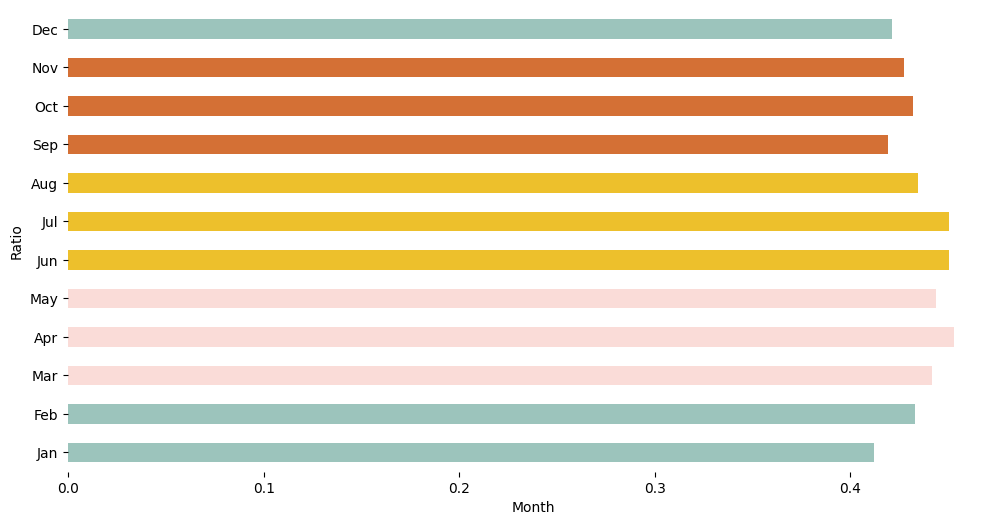

In [39]:
# Define colors for the four seasons: Winter, Spring, Summer, Autumn
season_colors = {
    'Jan': '#9CC4BC', 'Feb': '#9CC4BC', 'Mar': '#FADCD8',
    'Apr': '#FADCD8', 'May': '#FADCD8', 'Jun': '#EDC02C',
    'Jul': '#EDC02C', 'Aug': '#EDC02C', 'Sep': '#D47035',
    'Oct': '#D47035', 'Nov': '#D47035', 'Dec': '#9CC4BC'
}

# Colors list corresponding to each month
colors = [season_colors[month] for month in ordered_months]


# Plot the data
fig=plt.figure(figsize=(12, 6))
monthly_ratio.plot(kind='barh', color=colors)
#plt.title('Changes of Review-Rating Ratio over Month')
plt.xlabel('Month')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.box(on=None)

# Create a legend for the seasons
season_legend = {
    'Winter': '#9CC4BC',
    'Spring': '#FADCD8',
    'Summer': '#EDC02C',
    'Autumn': '#D47035'
}

# Create patch list for legend handles
patches = [mpatches.Patch(color=color, label=season) for season, color in season_legend.items()]

plt.legend(handles=patches, title="Seasons", loc='lower right', bbox_to_anchor=(1.15, 0), frameon=False)
plt.grid(False)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
plt.show()
fig.savefig("output_files/charts/review_rating_ratio_over_months.png", dpi=300, bbox_inches="tight", transparent=False)

In [40]:
reviews_df.to_csv('output_files/processing/review_with_geometry.csv', index=False)

In [41]:
def define_function(park_name):
    if isinstance(park_name, str):
        lower_park_name = park_name.lower()
        if 'playground' in lower_park_name or 'field' in lower_park_name :
            return 'Playground'
        elif 'court' in lower_park_name or 'tennis' in lower_park_name:
            return 'Sport Court'
        elif 'banks' in lower_park_name or 'river' in lower_park_name or 'creek' in lower_park_name:
            return 'Watershed Park'
        elif 'memorial' in lower_park_name:
            return 'Memorial Park'
        elif 'square' in lower_park_name or 'plaza' in lower_park_name :
            return 'Plaza'
        elif 'valley' in lower_park_name or 'wood' in lower_park_name or 'hill' in lower_park_name :
            return 'Natural Reservation'
        else:
            return 'Regular'

reviews_df['Function'] = reviews_df['ParkName'].apply(define_function)

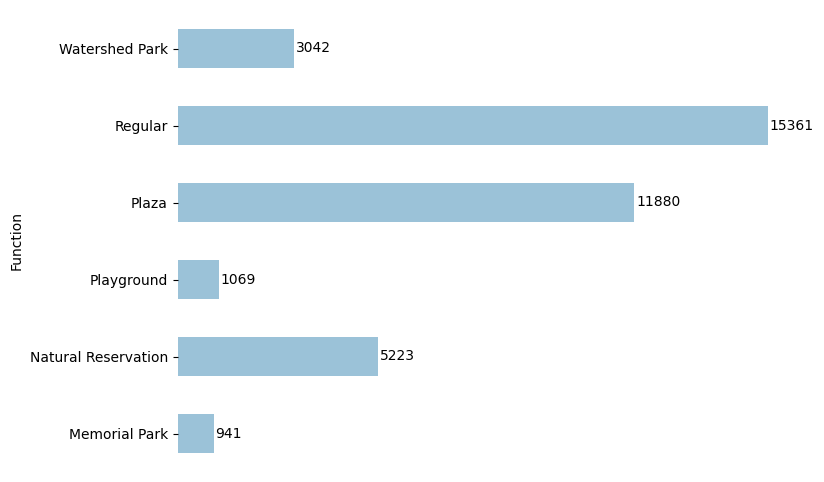

In [42]:
function_reviews = reviews_df.groupby('Function').size()

fig, ax = plt.subplots(figsize=(8, 6))
bars = function_reviews.plot(kind='barh', ax=ax, color='#9BC2D8') 

# Remove the x-axis
ax.xaxis.set_visible(False)

# Add values at the end of each bar
for bar in bars.patches:
    ax.text(bar.get_width() +50,  
            bar.get_y() + bar.get_height()/2,  
            f'{int(bar.get_width())}',
            va='center') 

#plt.title('Number of Reviews by Park Function')
#plt.ylabel('Function')
#plt.xlabel('Number of Reviews')
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True, right=True, top=True) 
plt.grid(False)  
plt.show()

fig.savefig("output_files/charts/review_amounts_by_function.png", dpi=300, bbox_inches="tight", transparent=False)

## *Mapping*

In [43]:
reviews_df.head()

,ParkName,timestamp,author,user_id,review_text,rating,place_id,Long,Lat,geometry,time,Function
1,Julian Abele Park,2023-10-05 23:03:18,Edson Matute,115156681408051985266,Es un buen lugar para niños de 6 años para aba...,4,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2023-10-05 23:03:18,Regular
2,Julian Abele Park,2023-08-05 05:02:57,Megan Fox,109307441981026484611,A nice park in South Center City! Enjoy the ev...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2023-08-05 05:02:57,Regular
7,Julian Abele Park,2022-05-30 03:02:34,Harriet Strong,110181439469374211925,Nice park. The toddlers had a great time. My f...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2022-05-30 03:02:34,Regular
13,Julian Abele Park,2021-10-19 18:32:05,Luke Sondergaard,102520574167486358626,Sometimes it is simply nice to have a quiet fa...,4,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2021-10-19 18:32:05,Regular
14,Julian Abele Park,2021-10-13 17:46:22,Megan Wilcox,106253592949393170364,Update: it's randomly used! I saw someone te...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2021-10-13 17:46:22,Regular


In [44]:
review_count_by_park = reviews_df.groupby('ParkName')['review_text'].count().reset_index(name='review_count_by_park')

In [45]:
park_plot = reviews_df.drop_duplicates(subset='ParkName')[['ParkName', 'Long', 'Lat']]
park_plot = park_plot.merge(review_count_by_park, on='ParkName', how='left')

park_plot.head()

,ParkName,Long,Lat,review_count_by_park
0,Julian Abele Park,-75.179268,39.940884,47
1,Campbell Square,-75.103270,39.986360,206
2,Eakins Oval,-75.178359,39.963627,165
3,Sister Cities Park,-75.169340,39.957910,718
4,Sister Clara Muhammad Square,-75.169339,39.957906,718


In [46]:
park_plot.sort_values(by='review_count_by_park', ascending=False).head(10)

,ParkName,Long,Lat,review_count_by_park
90,John F Kennedy Plaza (LOVE Park),-75.165640,39.954132,6219
54,Wissahickon Valley Park,-75.217331,40.056211,2920
48,Rittenhouse Square,-75.171892,39.949462,2794
24,East Fairmount Park,-75.197028,39.984455,2028
83,Franklin Delano Roosevelt Park,-75.183810,39.902140,2009
47,Belmont Plateau,-75.212664,39.990324,1726
21,Pleasant Hill Park,-74.992840,40.042570,1479
57,Penn Treaty Park,-75.128479,39.966274,1318
89,Clarence H Clark Park,-75.210414,39.948897,1216
13,Tacony Creek Park,-75.112982,40.033600,1018


In [47]:
park_plot = gpd.GeoDataFrame(
    park_plot, 
    geometry=gpd.points_from_xy(park_plot['Long'], park_plot['Lat'])
)

# Set the original CRS for the GeoDataFrame
park_plot.set_crs('EPSG:4326', inplace=True)

#park_plot.to_crs('EPSG:3857', inplace=True)

,ParkName,Long,Lat,review_count_by_park,geometry
0,Julian Abele Park,-75.179268,39.940884,47,POINT (-75.17927 39.94088)
1,Campbell Square,-75.103270,39.986360,206,POINT (-75.10327 39.98636)
2,Eakins Oval,-75.178359,39.963627,165,POINT (-75.17836 39.96363)
3,Sister Cities Park,-75.169340,39.957910,718,POINT (-75.16934 39.95791)
4,Sister Clara Muhammad Square,-75.169339,39.957906,718,POINT (-75.16934 39.95791)
...,...,...,...,...,...
87,Fanny Kemble Abolitionist Memorial Park,-75.149800,40.039980,76,POINT (-75.14980 40.03998)
88,Colonel Thomas J Powers Park,-75.108931,39.982504,51,POINT (-75.10893 39.98250)
89,Clarence H Clark Park,-75.210414,39.948897,1216,POINT (-75.21041 39.94890)
90,John F Kennedy Plaza (LOVE Park),-75.165640,39.954132,6219,POINT (-75.16564 39.95413)


In [48]:
print(park_plot.crs)

EPSG:4326


In [49]:
planning_districts = gpd.read_file("data/Planning_Districts.geojson")
city_limits = gpd.read_file("data/City_Limits.geojson")
hydrographic_line = gpd.read_file("data/Hydrographic_Features_Arc.geojson")

In [50]:
ppr = gpd.read_file("data/ppr_properties.geojson")

In [51]:
url = "https://services.arcgis.com/fLeGjb7u4uXqeF9q/arcgis/rest/services/Hydrographic_Features_Poly/FeatureServer/1/query?outFields=*&where=1%3D1&f=geojson"
hydrographic_poly = gpd.read_file(url)

In [52]:
planning_districts.set_crs('EPSG:4326', inplace=True)
city_limits.set_crs('EPSG:4326', inplace=True)
hydrographic_poly.set_crs('EPSG:4326', inplace=True)
ppr.set_crs('EPSG:4326', inplace=True)


,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length,geometry
0,1,William H (Billy) Markward Memorial Playground,Schuylkill River Park,Y,William H. (Billy) Markward Memorial Playground,Markward,Joseph O'Connor Memorial Pool,1903,400 S TANEY ST,19146,...,5;7,2,9;17,Y,Y,Y,Markward site includes the O'Connor Pool,25871.441406,1094.402639,"MULTIPOLYGON (((-75.18307 39.94826, -75.18314 ..."
1,2,Schuylkill Banks,Schuylkill Banks,N,None,Schuylkill Banks,None,2794,2425 CHESTNUT ST,19103,...,5;7,2;5,9;17,Y,Y,N,Bill 160113 (4/14/16) -South of South St Bridge,101477.171875,9300.670275,"POLYGON ((-75.18103 39.96361, -75.18075 39.963..."
2,3,Schuylkill River Park,Schuylkill River Park,N,None,Schuylkill River Park,None,2992,400 S TANEY ST,19146,...,"5, 7",2,9,Y,Y,N,None,27216.929688,799.048584,"POLYGON ((-75.18314 39.94821, -75.18307 39.948..."
3,4,Frankford Boat Launch,Frankford Boat Launch,N,Frankford Boat Launch,Frankford Launch,PA Fish & Boat;Frankford Arsenal Boat Launch,3090,5625 TACONY ST,19137,...,2,6,15,Y,Y,N,None,78515.335938,1585.376114,"POLYGON ((-75.05596 40.00750, -75.05601 40.007..."
4,5,Robert A Borski Park,Robert A Borski Park,N,Robert A. Borski Park,Borski,Orthodox Street Parcel; Bridesburg Riverfront ...,3091,3101 ORTHODOX ST,19137,...,2,6,15,Y,Y,N,Officially acquired from PAID in 10/2019. Doc ...,72926.187500,1304.901416,"POLYGON ((-75.06707 39.99007, -75.06713 39.990..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,504,Lawrence Court Breezeways,Lawrence Court Breezeways,N,None,Lawrence Breezeway,Lawrence Court Walkways,3867,335 LAWRENCE CT,19106,...,5,1,6,N,Y,N,None,1945.863281,394.259401,"MULTIPOLYGON (((-75.14944 39.94398, -75.14942 ..."
504,505,Fernhill Park,Fernhill Park,N,None,Fernhill,,833,4600 MORRIS ST,19144,...,4,8,39,Y,Y,N,None,294423.921875,4327.841898,"MULTIPOLYGON (((-75.16817 40.02145, -75.16692 ..."
505,506,School District Area (Gorgas),Susan Gorgas Park,Y,None,Gorgas (School District),None,0,None,19128,...,4,4,5,N,N,N,1927 Transferred to SD to manage and maintain.,58382.015625,986.309218,"POLYGON ((-75.22218 40.03518, -75.22431 40.034..."
506,507,Susan Gorgas Park,Susan Gorgas Park,Y,Susan Gorgas Park,Gorgas,None,803,6424 RIDGE AVE,19128,...,4,4,5,Y,Y,N,None,87612.011719,1246.794516,"POLYGON ((-75.22197 40.03528, -75.22200 40.035..."


In [53]:
import requests
import numpy as np

In [54]:
hydro = gpd.read_file("data/hydro.geojson")

In [55]:
hydro.set_crs('EPSG:4326', inplace=True)

,FID,OBJECTID,CREEK_NAME,MUNI,COUNTY,WATERSHED,SUBSHED,LABEL,SEGMENT_ID,REACH_ID,...,FACILITYID,EDITOR,EDIT_DATE,NOTES,RIVERMILE,Shape__Are,Shape__Len,Shape__Area,Shape__Length,geometry
0,1,1,Haines-Dittingers Creek,Upper Gwynedd Township,Montgomery,Wissahickon Creek,Haines-Dittingers Creek,,WSHD01,WSHD02,...,,,NaN,,0,3317.621094,236.632183,3317.644531,236.632192,"POLYGON ((-75.25122 40.21712, -75.25120 40.217..."
1,2,2,Haines-Dittingers Creek,Upper Gwynedd Township,Montgomery,Wissahickon Creek,Haines-Dittingers Creek,,WSHD01,WSHD02,...,,,NaN,,0,2942.503906,324.310270,2942.519531,324.310358,"POLYGON ((-75.25101 40.21598, -75.25098 40.216..."
2,3,3,Trewellyn Creek,Montgomery TWP,Montgomery,Wissahickon Creek,Trewellyn Creek,,WSTW03,WSTW02,...,,,NaN,,0,126.367188,76.575301,126.359375,76.575178,"POLYGON ((-75.23718 40.21381, -75.23722 40.213..."
3,4,4,"Trewellyn Creek, unnamed trib (A)",Lower Gwynedd,Montgomery,Wissahickon Creek,Trewellyn Creek,,WSTWA01,WSTWA02,...,,,NaN,,0,104.359375,76.567094,104.363281,76.567140,"POLYGON ((-75.24365 40.21204, -75.24367 40.212..."
4,5,5,Trewellyn Creek,Lower Gwynedd,Montgomery,Wissahickon Creek,Trewellyn Creek,,WSTW03,WSTW04,...,,,NaN,,0,48.531250,36.246650,48.531250,36.246731,"POLYGON ((-75.23625 40.21078, -75.23627 40.210..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,7934,7934,"Delaware River, unnamed tributary",Philadelphia city,Philadelphia County,Delaware Direct Watershed,,,,,...,,GIS Co-op,1.529453e+12,To be verified,0,822.199219,459.454258,822.214844,459.454196,"POLYGON ((-75.15103 39.89441, -75.15115 39.894..."
7934,7935,7935,"Delaware River, unnamed tributary",Philadelphia city,Philadelphia County,Delaware Direct Watershed,,,,,...,,GIS Co-op,1.529453e+12,To be verified,0,124.808594,78.744893,124.804688,78.744645,"POLYGON ((-75.15243 39.89552, -75.15255 39.895..."
7935,7936,7936,"Delaware River, unnamed tributary",Philadelphia city,Philadelphia County,Delaware Direct Watershed,,,,,...,,GIS Co-op,1.529453e+12,To be verified,0,6275.476562,2793.400748,6275.460938,2793.400570,"POLYGON ((-75.15272 39.89561, -75.15274 39.895..."
7936,7937,7937,"Delaware River, unnamed tributary",Philadelphia city,Philadelphia County,Delaware Direct Watershed,,,,,...,,GIS Co-op,1.529453e+12,To be verified,0,34.488281,58.042367,34.492188,58.042429,"POLYGON ((-75.16870 39.89667, -75.16883 39.896..."


In [56]:
hydro = gpd.clip(hydro, city_limits)

In [57]:
ppr = gpd.clip(ppr, city_limits)

In [58]:
park_plot.head()

,ParkName,Long,Lat,review_count_by_park,geometry
0,Julian Abele Park,-75.179268,39.940884,47,POINT (-75.17927 39.94088)
1,Campbell Square,-75.103270,39.986360,206,POINT (-75.10327 39.98636)
2,Eakins Oval,-75.178359,39.963627,165,POINT (-75.17836 39.96363)
3,Sister Cities Park,-75.169340,39.957910,718,POINT (-75.16934 39.95791)
4,Sister Clara Muhammad Square,-75.169339,39.957906,718,POINT (-75.16934 39.95791)


In [59]:
# Picking two examples
vietnam_veterans_memorial = park_plot[park_plot['ParkName'] == 'Philadelphia Vietnam Veterans Memorial']
schuylkill_banks = park_plot[park_plot['ParkName'] == 'Wissahickon Valley Park']

FileNotFoundError: [Errno 2] No such file or directory: 'output_files/maps/review_example2.jpg'

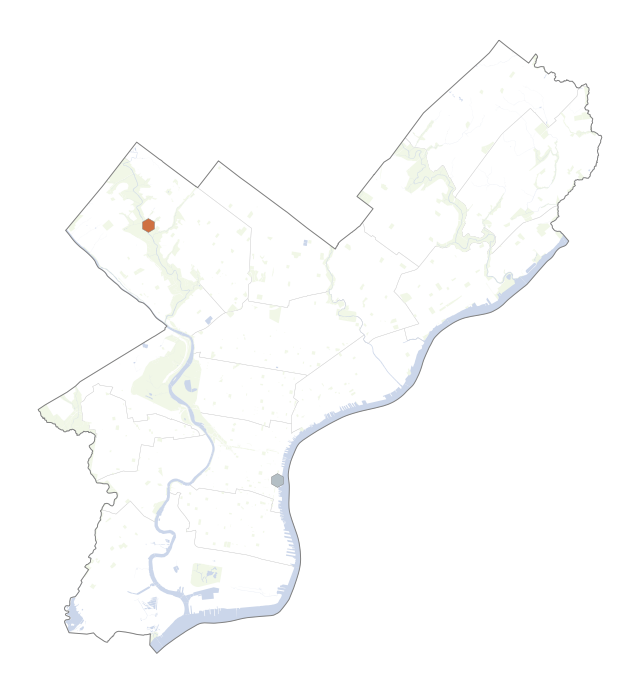

In [60]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

## Base
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

## Scatter plot for 'Philadelphia Vietnam Veterans Memorial'
ax.scatter(vietnam_veterans_memorial['Long'], vietnam_veterans_memorial['Lat'], 
           color='#B4BFC5', edgecolor='grey', marker='h', linewidth=0.3, label='Philadelphia Vietnam Veterans Memorial', s=100)

## Scatter plot for 'Schuylkill Banks'
ax.scatter(schuylkill_banks['Long'], schuylkill_banks['Lat'], 
           color='#CF7041', edgecolor='grey', marker='h', linewidth=0.3, label='Wissahickon Valley Park', s=100)

# Remove axes spines
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)


plt.savefig('output_files/maps/review_example2.jpg', format='jpg', dpi=300)

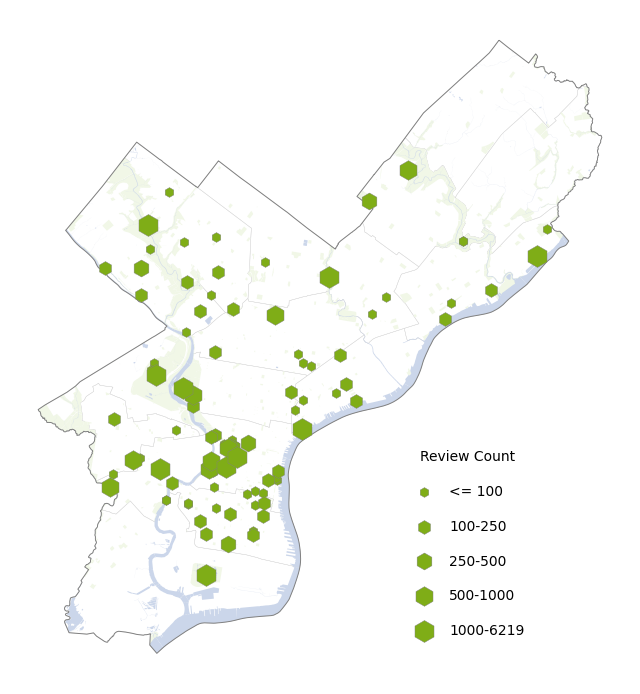

In [62]:
breaks = [0, 100, 250, 500, 1000, max(park_plot['review_count_by_park'])]

# Map review counts to size categories based on custom breaks
def map_size_category(x):
    for i in range(len(breaks) - 1):
        if x <= breaks[i + 1]:
            return (i + 1) * 50  

park_plot['size_category'] = park_plot['review_count_by_park'].apply(map_size_category)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

# Create a scatter plot with hexagonal markers
size_mapping = {
    50: f'<= {breaks[1]}',
    100: f'{breaks[1]}-{breaks[2]}',
    150: f'{breaks[2]}-{breaks[3]}',
    200: f'{breaks[3]}-{breaks[4]}',
    250: f'{breaks[4]}-{breaks[5]}'
}
for size, label in size_mapping.items():
    subset = park_plot[park_plot['size_category'] == size]
    ax.scatter(subset['Long'], subset['Lat'], s=size, label=label, color='#7fad17', edgecolor='grey', marker='h', linewidth=0.3)

# Position the legend at the bottom right
ax.legend(title='Review Count', loc='lower right', bbox_to_anchor=(0.85, 0.05), frameon=False, labelspacing=1.5)

# Remove axes spines
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)

plt.savefig('output_files/maps/review_amounts_over_city2.jpg', format='jpg', dpi=300)
plt.show()

# **Sentiment**

## Apply Model (Raw Chunks - Jump to Load Data Please)

In [63]:
# with reviews

reviews_df = combined_df[combined_df['review_text'].notna()]

reviews_df.head()

,ParkName,timestamp,author,user_id,review_text,rating,place_id,Long,Lat,geometry,time
1,Julian Abele Park,10/05/2023 23:03:18,Edson Matute,115156681408051985266,Es un buen lugar para niños de 6 años para aba...,4,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2023-10-05 23:03:18
2,Julian Abele Park,08/05/2023 05:02:57,Megan Fox,109307441981026484611,A nice park in South Center City! Enjoy the ev...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2023-08-05 05:02:57
7,Julian Abele Park,05/30/2022 03:02:34,Harriet Strong,110181439469374211925,Nice park. The toddlers had a great time. My f...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2022-05-30 03:02:34
13,Julian Abele Park,10/19/2021 18:32:05,Luke Sondergaard,102520574167486358626,Sometimes it is simply nice to have a quiet fa...,4,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2021-10-19 18:32:05
14,Julian Abele Park,10/13/2021 17:46:22,Megan Wilcox,106253592949393170364,Update: it's randomly used! I saw someone te...,5,ChIJHShWn2rGxokRKdH8EZ4e3To,-75.179268,39.940884,POINT (-75.179268 39.940884),2021-10-13 17:46:22


In [ ]:
from transformers import pipeline

# Load the sentiment analysis pipeline
pipe = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Make sure all entries in the 'text' column are strings
#reviews_df['review_text'] = reviews_df['review_text'].astype(str)

# Apply the pipeline to each review
reviews_df['review_predictions'] = reviews_df['review_text'].apply(lambda x: pipe(x, truncation=True)) 

# Extract the label and score from the predictions
reviews_df['review_label'] = reviews_df['review_predictions'].apply(lambda x: x[0]['label'])
reviews_df['review_score'] = reviews_df['review_predictions'].apply(lambda x: x[0]['score'])

/Users/delmelle/miniforge3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
reviews_df.head()

In [ ]:
# Transform Negative and Positive Sentiment

reviews_df['sentiment'] = reviews_df.apply(lambda x: x['review_score'] if x['review_label'] == 'POSITIVE' else (-x['review_score'] if x['review_label'] == 'NEGATIVE' else 0), axis=1)


reviews_df.head()

In [ ]:
reviews_df.to_csv('output_files/review_w_sentiment.csv', index=False)

In [96]:
import os
import glob
import pandas as pd

reviews_df = pd.read_csv('output_files/review_w_sentiment.csv')

## Load Data with Sentiment Score

In [97]:
import os
import glob

reviews_df = pd.read_csv('output_files/review_w_sentiment.csv')
reviews_df = reviews_df[reviews_df['ParkName'] != 'Fish Hatchery at Pleasant Hill Park'] # Making sure no duplication


## Correlation

### *Monthly Change*

In [98]:
reviews_df.head()

,timestamp,author,user_id,review_text,rating,place_id,ParkName,Lat,Long,time,review_predictions,review_label,review_score,sentiment
0,12/30/2023 19:08:54,Eleni Belisonzi,106030427780813104531,A neighbor jewel.,5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-12-30 19:08:54,"[{'label': 'POSITIVE', 'score': 0.995235741138...",POSITIVE,0.995236,0.995236
1,08/14/2023 17:51:59,Marta Harrison,116743363301808220011,"visited in a nostalgia trip, as I took my todd...",4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-08-14 17:51:59,"[{'label': 'POSITIVE', 'score': 0.999670982360...",POSITIVE,0.999671,0.999671
2,06/06/2023 11:43:07,Akshita Srivastava,111921958911249462562,"Hung out in peace, great for solitude lovers",5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-06-06 11:43:07,"[{'label': 'POSITIVE', 'score': 0.999643683433...",POSITIVE,0.999644,0.999644
3,04/20/2023 20:58:42,Andy Reinoso,116446471570828426598,Nice little park in the middle of old historic...,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-04-20 20:58:42,"[{'label': 'POSITIVE', 'score': 0.999513149261...",POSITIVE,0.999513,0.999513
4,03/20/2023 22:03:31,Moaaz Marzouk,110355050307790944461,Nice small place for kids,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-03-20 22:03:31,"[{'label': 'POSITIVE', 'score': 0.999785721302...",POSITIVE,0.999786,0.999786


In [99]:
# Ensure the 'timestamp' column is of datetime type
reviews_df['time'] = pd.to_datetime(reviews_df['time'], errors='coerce')

# Filter for rows where the timestamp is greater than 2016
reviews_df = reviews_df[reviews_df['time'].dt.year >= 2016]

In [100]:
# Extract the month as a numerical value
reviews_df['month'] = reviews_df['time'].dt.month

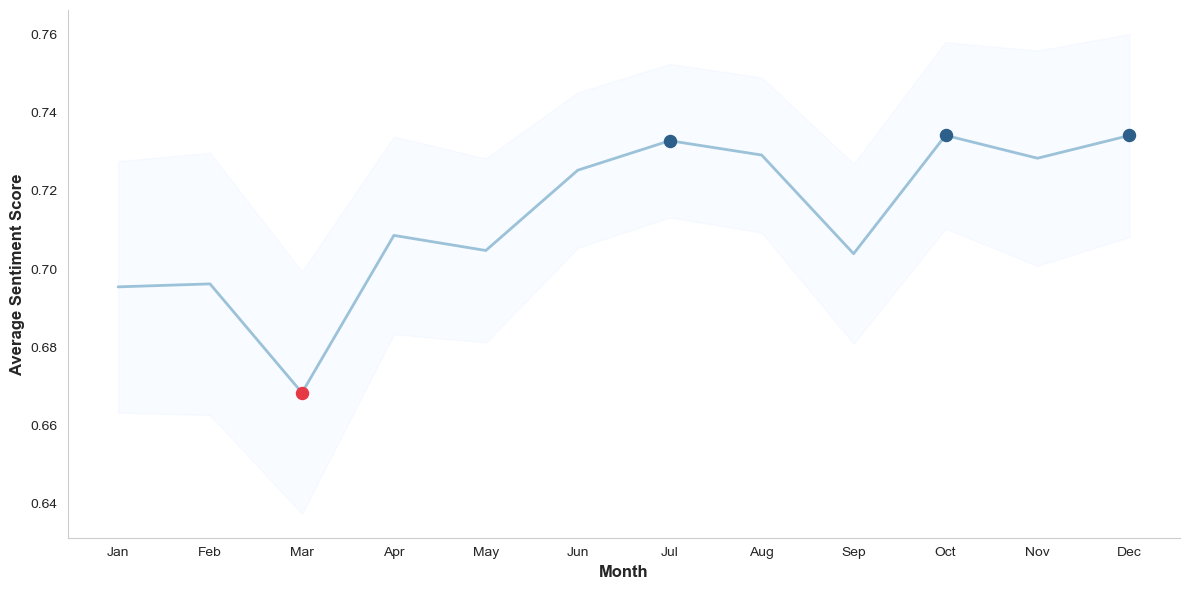

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average, standard deviation, and count for each month
monthly_stats = reviews_df.groupby('month')['sentiment'].agg(
    avg_sentiment='mean',
    std_dev='std',
    count='size'
).reset_index()

# Create a dictionary to map month numbers to month names
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Map the month numbers to month names
monthly_stats['month_name'] = monthly_stats['month'].map(month_names)

# Calculate the 95% confidence interval
monthly_stats['ci95_high'] = monthly_stats['avg_sentiment'] + 1.96 * (monthly_stats['std_dev'] / np.sqrt(monthly_stats['count']))
monthly_stats['ci95_low'] = monthly_stats['avg_sentiment'] - 1.96 * (monthly_stats['std_dev'] / np.sqrt(monthly_stats['count']))

# Set the style of seaborn for a clean look
sns.set_style("whitegrid")  
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the average sentiment score for each month
ax.plot(
    monthly_stats['month_name'], 
    monthly_stats['avg_sentiment'], 
    linestyle='-', 
    linewidth=2, 
    color='#9BC2D8',  
    label='Average Sentiment Score'
)

# Add a shaded area for the 95% confidence interval
ax.fill_between(
    monthly_stats['month_name'], 
    monthly_stats['ci95_low'], 
    monthly_stats['ci95_high'], 
    color='#E9F3FF', 
    alpha=0.3,  # Transparency level
    label='95% Confidence Interval'
)

#dot for March
ax.scatter(
    'Mar', 
    monthly_stats[monthly_stats['month_name'] == 'Mar']['avg_sentiment'].values[0], 
    color='#e63946', 
    s=75, 
    zorder=5
)

#dots for July, October, and December
for month in ['Jul', 'Oct', 'Dec']:
    ax.scatter(
        month, 
        monthly_stats[monthly_stats['month_name'] == month]['avg_sentiment'].values[0], 
        color='#2C5F8A', 
        s=75, 
        zorder=5)
    

# Customize the ticks on the x-axis to show month names
ax.set_xticks(range(len(month_names)))
ax.set_xticklabels(list(month_names.values()), fontsize=10)

# Add labels and title
ax.set_xlabel('Month', fontsize=12, weight='bold')
ax.set_ylabel('Average Sentiment Score', fontsize=12, weight='bold')

# Remove the top and right spines for a cleaner look
sns.despine(left=False, bottom=False, right=True, top=True) 
plt.grid(False) 
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig('output_files/charts/sentiment_over_month.jpg', format='jpg', dpi=300)

### *Annual Change*

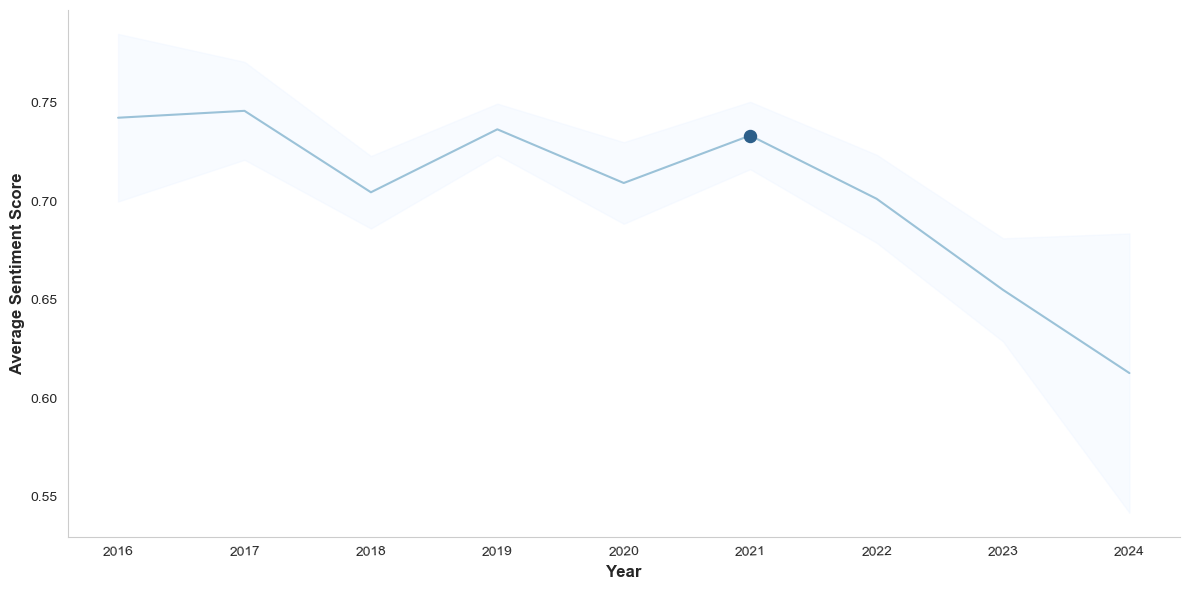

In [102]:
from scipy.stats import t
sns.set_style("whitegrid")
reviews_df['time'] = pd.to_datetime(reviews_df['time'])
reviews_df['year'] = reviews_df['time'].dt.year

# Group by year and calculate mean, count, and standard deviation
annual_data = reviews_df.groupby('year')['sentiment'].agg(['mean', 'count', 'std']).reset_index()

# Calculate the Standard Error and Confidence Intervals
annual_data['se'] = annual_data['std'] / np.sqrt(annual_data['count'])
annual_data['ci95'] = t.ppf(0.975, annual_data['count']-1) * annual_data['se']

# Adding columns for the lower and upper confidence limits
annual_data['lower_ci'] = annual_data['mean'] - annual_data['ci95']
annual_data['upper_ci'] = annual_data['mean'] + annual_data['ci95']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(annual_data['year'], annual_data['mean'], color='#9BC2D8', label='Average Sentiment Score')
plt.fill_between(annual_data['year'], annual_data['lower_ci'], annual_data['upper_ci'], color='#E9F3FF', alpha=0.3)

# Add a dot for x = 2021
year_2021_value = annual_data[annual_data['year'] == 2021]['mean'].values[0]
ax.scatter(2021, year_2021_value, color='#2C5F8A', s=75, zorder=5)


plt.xticks(annual_data['year'].unique(), rotation=2)  # Ensure unique years are listed on x-axis
plt.xlabel('Year', fontsize=12, weight='bold')
plt.ylabel('Average Sentiment Score', fontsize=12, weight='bold')
#plt.title('Average Sentiment Score with 95% Confidence Interval by Year', fontsize=14, weight='bold')
sns.despine(left=False, bottom=False, right=True, top=True) 
plt.grid(False) 
plt.tight_layout()
plt.show()
fig.savefig('output_files/charts/sentiment_over_year.jpg', format='jpg', dpi=300)

### *Variation from Functions*

In [103]:
print(reviews_df['ParkName'])

0                   Delancey Park
1                   Delancey Park
2                   Delancey Park
3                   Delancey Park
4                   Delancey Park
                   ...           
37209    Giuseppe Bardascino Park
37210    Giuseppe Bardascino Park
37211    Giuseppe Bardascino Park
37212    Giuseppe Bardascino Park
37213    Giuseppe Bardascino Park
Name: ParkName, Length: 35537, dtype: object


In [104]:
def define_function(park_name):
    if isinstance(park_name, str):
        lower_park_name = park_name.lower()
        if 'playground' in lower_park_name or 'field' in lower_park_name :
            return 'Playground'
        elif 'court' in lower_park_name or 'tennis' in lower_park_name:
            return 'Sport Court'
        elif 'banks' in lower_park_name or 'river' in lower_park_name or 'creek' in lower_park_name:
            return 'Watershed Park'
        elif 'memorial' in lower_park_name:
            return 'Memorial Park'
        elif 'square' in lower_park_name or 'plaza' in lower_park_name :
            return 'Plaza'
        elif 'valley' in lower_park_name or 'wood' in lower_park_name or 'hill' in lower_park_name :
            return 'Natural Reservation'
        else:
            return 'Regular'

reviews_df['Function'] = reviews_df['ParkName'].apply(define_function)

In [105]:
reviews_df.head()

,timestamp,author,user_id,review_text,rating,place_id,ParkName,Lat,Long,time,review_predictions,review_label,review_score,sentiment,month,year,Function
0,12/30/2023 19:08:54,Eleni Belisonzi,106030427780813104531,A neighbor jewel.,5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-12-30 19:08:54,"[{'label': 'POSITIVE', 'score': 0.995235741138...",POSITIVE,0.995236,0.995236,12,2023,Regular
1,08/14/2023 17:51:59,Marta Harrison,116743363301808220011,"visited in a nostalgia trip, as I took my todd...",4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-08-14 17:51:59,"[{'label': 'POSITIVE', 'score': 0.999670982360...",POSITIVE,0.999671,0.999671,8,2023,Regular
2,06/06/2023 11:43:07,Akshita Srivastava,111921958911249462562,"Hung out in peace, great for solitude lovers",5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-06-06 11:43:07,"[{'label': 'POSITIVE', 'score': 0.999643683433...",POSITIVE,0.999644,0.999644,6,2023,Regular
3,04/20/2023 20:58:42,Andy Reinoso,116446471570828426598,Nice little park in the middle of old historic...,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-04-20 20:58:42,"[{'label': 'POSITIVE', 'score': 0.999513149261...",POSITIVE,0.999513,0.999513,4,2023,Regular
4,03/20/2023 22:03:31,Moaaz Marzouk,110355050307790944461,Nice small place for kids,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-03-20 22:03:31,"[{'label': 'POSITIVE', 'score': 0.999785721302...",POSITIVE,0.999786,0.999786,3,2023,Regular


/var/folders/q1/9z694pbs3cx7p133qs52sh6r0000gn/T/ipykernel_78957/2480859689.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(y='Function', x='mean', data=function_stats, ci=None, palette=bar_colors)


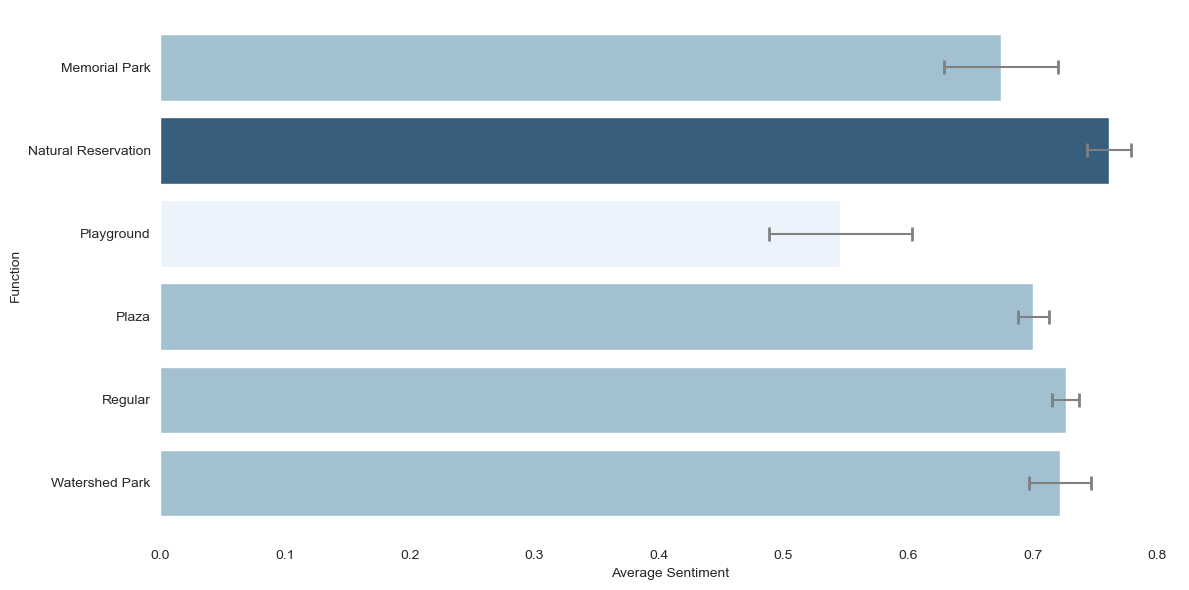

In [106]:
from scipy import stats
function_stats = reviews_df.groupby('Function')['sentiment'].agg(['mean', 'std', 'count']).reset_index()

# Calculate the 95% confidence interval for the mean sentiment
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # two-tailed z-score for 95% confidence
function_stats['ci95_high'] = function_stats['mean'] + (z_score * function_stats['std'] / np.sqrt(function_stats['count']))
function_stats['ci95_low'] = function_stats['mean'] - (z_score * function_stats['std'] / np.sqrt(function_stats['count']))

# Now plot with confidence intervals
fig, ax = plt.subplots(figsize=(12, 6))

# Define the colors for each function
bar_colors = ['#9BC2D8' if func != 'Natural Reservation' and func != 'Playground' else '#2C5F8A' if func == 'Natural Reservation' else '#E9F3FF'
              for func in function_stats['Function']]

barplot = sns.barplot(y='Function', x='mean', data=function_stats, ci=None, palette=bar_colors)

# Add error bars for the confidence intervals manually
for index, row in function_stats.iterrows():
    plt.errorbar(y=index, x=row['mean'], xerr=[[row['mean'] - row['ci95_low']], [row['ci95_high'] - row['mean']]],
                 fmt='none', c='gray', capsize=5, capthick=2)

sns.despine(left=True, bottom=True, right=True, top=True) 
plt.grid(False)   
plt.xticks(rotation=0)  
plt.xlabel('Average Sentiment')
plt.ylabel('Function')
#plt.title('Average Sentiment Score by Park Function with 95% CI')

# Show the plot
plt.tight_layout()
plt.show()

fig.savefig('output_files/charts/sentiment_by_function_notitle2.jpg', format='jpg', dpi=300)


### *Sentiment Map*

In [107]:
average_sentiments = reviews_df.groupby('ParkName').agg({'sentiment': 'mean'})
#park_plot = reviews_df.drop_duplicates(subset='ParkName')[['ParkName', 'Long', 'Lat']]
park_plot = park_plot.merge(average_sentiments, on='ParkName', how='left')

park_plot.head()
#len(park_plot)

,ParkName,Long,Lat,review_count_by_park,geometry,size_category,sentiment
0,Julian Abele Park,-75.179268,39.940884,47,POINT (-75.17927 39.94088),50,0.645137
1,Campbell Square,-75.103270,39.986360,206,POINT (-75.10327 39.98636),100,0.680962
2,Eakins Oval,-75.178359,39.963627,165,POINT (-75.17836 39.96363),100,0.677188
3,Sister Cities Park,-75.169340,39.957910,718,POINT (-75.16934 39.95791),200,0.897785
4,Sister Clara Muhammad Square,-75.169339,39.957906,718,POINT (-75.16934 39.95791),200,0.897785


In [108]:
# Sort the DataFrame by 'sentiment_x' and 'weighted_average_sentiment' in descending order
sorted_park_plot = park_plot.sort_values(by=['sentiment'], ascending=True)

# Display the sorted DataFrame
sorted_park_plot. head(15)

,ParkName,Long,Lat,review_count_by_park,geometry,size_category,sentiment
50,Hope Park,-75.127610,39.995490,59,POINT (-75.12761 39.99549),50,-0.143601
72,Frankford and Solly Playground,-75.079913,40.024715,71,POINT (-75.07991 40.02472),50,-0.009312
67,Disston Park,-75.042330,40.022058,37,POINT (-75.04233 40.02206),50,0.212147
74,Mifflin Square,-75.156519,39.919477,165,POINT (-75.15652 39.91948),100,0.264519
66,Marian Winfield Hissey Recreation Center,-75.123340,39.994330,50,POINT (-75.12334 39.99433),50,0.294164
33,Weccacoe Square,-75.150634,39.938151,41,POINT (-75.15063 39.93815),50,0.384816
87,Fanny Kemble Abolitionist Memorial Park,-75.149800,40.039980,76,POINT (-75.14980 40.03998),50,0.414379
64,Emanuel Weinberg Park,-75.156526,39.921253,24,POINT (-75.15653 39.92125),50,0.416422
19,Belmont and Edgley Fields,-75.213776,39.995501,31,POINT (-75.21378 39.99550),50,0.418373
22,Harrowgate Park,-75.106369,39.999218,139,POINT (-75.10637 39.99922),100,0.419615


In [109]:
park_plot.to_csv('output_files/processing/parkplot_sentiment.csv', index=False)

In [110]:
breaks = [0, 100, 250, 500, 1000, max(park_plot['review_count_by_park'])]

# Map review counts to size categories based on custom breaks
def map_size_category(x):
    for i in range(len(breaks) - 1):
        if x <= breaks[i + 1]:
            return (i + 1) * 50  # Increment size for each category

park_plot['size_category'] = park_plot['review_count_by_park'].apply(map_size_category)


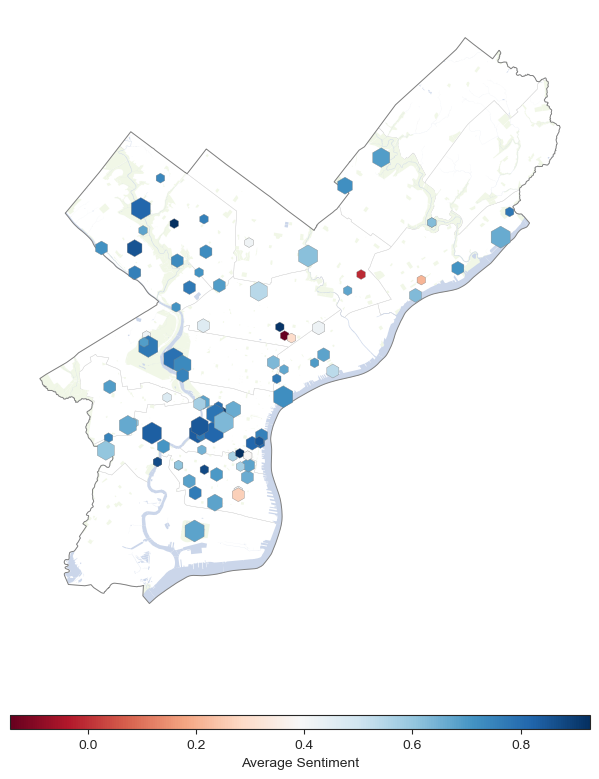

In [111]:
# Define custom breaks and corresponding sizes
breaks = [0, 100, 250, 500, 1000, max(park_plot['review_count_by_park'])]
sizes = [50, 100, 150, 200, 250]  # Sizes corresponding to each break interval

def map_size_category(x):
    for i, break_point in enumerate(breaks):
        if x <= break_point:
            return sizes[i]
    return sizes[-1]

sns.set_style('white')

fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)


sc = sns.scatterplot(data=park_plot, x='Long', y='Lat', hue='sentiment',
                     palette='RdBu', size='size_category', sizes=(50, 250),
                     ax=ax, edgecolor='grey',  linewidth=0.25, marker = 'h', legend=False)


# Color bar for sentiment
norm = plt.Normalize(park_plot['sentiment'].min(), park_plot['sentiment'].max())
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Average Sentiment')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25])  # Positioning color bar at bottom right



# Customize layout
ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/sentiment_mapping2.jpg', format='jpg', dpi=300)


### *Sentiment Map with Weight*

In [112]:
from datetime import datetime

reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'])

# Define a function to calculate weights based on exponential decay
def calculate_weights(dates, half_life='365 days'):
    """Calculate exponential decay weights for a series of dates."""
    # Get the number of days ago each review was made
    days_ago = (datetime.now() - dates).dt.days
    # Calculate weights using exponential decay
    weights = 0.5 ** (days_ago / pd.to_timedelta(half_life).days)
    return weights

# Calculate weights for each review
reviews_df['weights'] = calculate_weights(reviews_df['timestamp'])

In [113]:
weighted_averages = reviews_df.groupby('ParkName').apply(
    lambda x: (x['sentiment'] * x['weights']).sum() / x['weights'].sum() if x['weights'].sum() > 0 else None
)

In [114]:
reviews_df.head(50)

,timestamp,author,user_id,review_text,rating,place_id,ParkName,Lat,Long,time,review_predictions,review_label,review_score,sentiment,month,year,Function,weights
0,2023-12-30 19:08:54,Eleni Belisonzi,106030427780813104531,A neighbor jewel.,5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-12-30 19:08:54,"[{'label': 'POSITIVE', 'score': 0.995235741138...",POSITIVE,0.995236,0.995236,12,2023,Regular,0.533349
1,2023-08-14 17:51:59,Marta Harrison,116743363301808220011,"visited in a nostalgia trip, as I took my todd...",4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-08-14 17:51:59,"[{'label': 'POSITIVE', 'score': 0.999670982360...",POSITIVE,0.999671,0.999671,8,2023,Regular,0.410390
2,2023-06-06 11:43:07,Akshita Srivastava,111921958911249462562,"Hung out in peace, great for solitude lovers",5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-06-06 11:43:07,"[{'label': 'POSITIVE', 'score': 0.999643683433...",POSITIVE,0.999644,0.999644,6,2023,Regular,0.359307
3,2023-04-20 20:58:42,Andy Reinoso,116446471570828426598,Nice little park in the middle of old historic...,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-04-20 20:58:42,"[{'label': 'POSITIVE', 'score': 0.999513149261...",POSITIVE,0.999513,0.999513,4,2023,Regular,0.329251
4,2023-03-20 22:03:31,Moaaz Marzouk,110355050307790944461,Nice small place for kids,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-03-20 22:03:31,"[{'label': 'POSITIVE', 'score': 0.999785721302...",POSITIVE,0.999786,0.999786,3,2023,Regular,0.310428
5,2023-01-06 21:14:44,Lester Cohen,107353926374783914199,Nice place for younger kids,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-01-06 21:14:44,"[{'label': 'POSITIVE', 'score': 0.999858021736...",POSITIVE,0.999858,0.999858,1,2023,Regular,0.270243
6,2023-01-02 15:16:01,Amy Ortiz 26,108848103542446569197,Its a very clean and quiet park. We went in th...,5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-01-02 15:16:01,"[{'label': 'POSITIVE', 'score': 0.999791204929...",POSITIVE,0.999791,0.999791,1,2023,Regular,0.268198
7,2022-08-29 22:52:54,Anna D. W.,103595414781637477967,"Perfect location, nice neighborhood but the pl...",4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2022-08-29 22:52:54,"[{'label': 'NEGATIVE', 'score': 0.981460094451...",NEGATIVE,0.981460,-0.981460,8,2022,Regular,0.211124
8,2022-07-12 02:43:38,Fanny MAREMBERT,101124383420107000567,Good place,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2022-07-12 02:43:38,"[{'label': 'POSITIVE', 'score': 0.999851942062...",POSITIVE,0.999852,0.999852,7,2022,Regular,0.192365
9,2022-05-08 18:57:46,Alice Lee,111348396730569919746,Our favorite little spot after school 🏫,5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2022-05-08 18:57:46,"[{'label': 'POSITIVE', 'score': 0.994684636592...",POSITIVE,0.994685,0.994685,5,2022,Regular,0.170350


In [115]:
weighted_averages_df = weighted_averages.reset_index(name='weighted_average_sentiment')
park_plot = park_plot.merge(weighted_averages_df, on='ParkName', how='left')

park_plot.head()

,ParkName,Long,Lat,review_count_by_park,geometry,size_category,sentiment,weighted_average_sentiment
0,Julian Abele Park,-75.179268,39.940884,47,POINT (-75.17927 39.94088),50,0.645137,0.689037
1,Campbell Square,-75.103270,39.986360,206,POINT (-75.10327 39.98636),100,0.680962,0.739969
2,Eakins Oval,-75.178359,39.963627,165,POINT (-75.17836 39.96363),100,0.677188,0.452558
3,Sister Cities Park,-75.169340,39.957910,718,POINT (-75.16934 39.95791),200,0.897785,0.838859
4,Sister Clara Muhammad Square,-75.169339,39.957906,718,POINT (-75.16934 39.95791),200,0.897785,0.838859


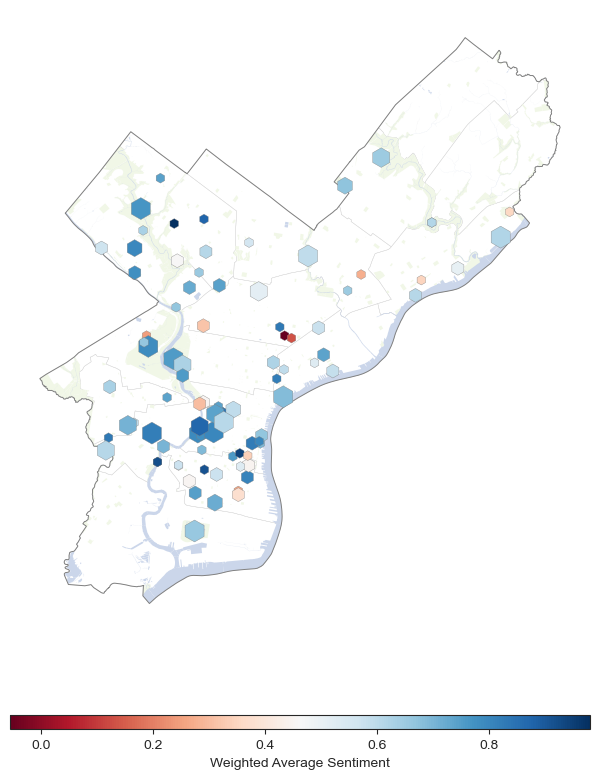

In [116]:
# Define custom breaks and corresponding sizes
breaks = [0, 100, 250, 500, 1000, max(park_plot['review_count_by_park'])]
sizes = [50, 100, 150, 200, 250]  # Sizes corresponding to each break interval

def map_size_category(x):
    for i, break_point in enumerate(breaks):
        if x <= break_point:
            return sizes[i]
    return sizes[-1]

sns.set_style('white')

fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)


sc = sns.scatterplot(data=park_plot, x='Long', y='Lat', hue='weighted_average_sentiment',
                     palette='RdBu', size='size_category', sizes=(50, 250),
                     ax=ax, edgecolor='grey',  linewidth=0.25, marker = 'h', legend=False)


# Color bar for sentiment
norm = plt.Normalize(park_plot['weighted_average_sentiment'].min(), park_plot['weighted_average_sentiment'].max())
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Average Sentiment')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25])  # Positioning color bar at bottom right



# Customize layout
ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/weighted_sentiment_mapping2.jpg', format='jpg', dpi=300)

# **Emotions**

## Apply 28 emotion labels model (Raw Chunks - Jump to Load Data Please)

In [117]:
len(reviews_df)

35537

## Load Reviews DF with Emotions

In [118]:
import pandas as pd

reviews_df = pd.read_csv('output_files/review_w_emotions_seperated.csv')
reviews_df = reviews_df[reviews_df['ParkName'] != 'Fish Hatchery at Pleasant Hill Park'] # Making sure no duplication

reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'])
reviews_df = reviews_df[reviews_df['timestamp'].dt.year >= 2016]

reviews_df.head()

,timestamp,author,user_id,review_text,rating,place_id,ParkName,Lat,Long,time,...,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
0,2023-12-30 19:08:54,Eleni Belisonzi,106030427780813104531,A neighbor jewel.,5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-12-30 19:08:54,...,0.001176,0.000392,0.968586,0.001877,0.000380,0.005319,0.000340,0.000415,0.002123,0.001158
1,2023-08-14 17:51:59,Marta Harrison,116743363301808220011,"visited in a nostalgia trip, as I took my todd...",4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-08-14 17:51:59,...,0.021185,0.002070,0.046001,0.004074,0.014304,0.033353,0.027964,0.000763,0.004404,0.002918
2,2023-06-06 11:43:07,Akshita Srivastava,111921958911249462562,"Hung out in peace, great for solitude lovers",5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-06-06 11:43:07,...,0.037376,0.000512,0.088383,0.004414,0.010218,0.006221,0.008279,0.000474,0.004261,0.000506
3,2023-04-20 20:58:42,Andy Reinoso,116446471570828426598,Nice little park in the middle of old historic...,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-04-20 20:58:42,...,0.002987,0.000345,0.158318,0.009164,0.007238,0.011970,0.005709,0.000175,0.001040,0.000501
4,2023-03-20 22:03:31,Moaaz Marzouk,110355050307790944461,Nice small place for kids,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-03-20 22:03:31,...,0.002805,0.000106,0.056614,0.005207,0.002069,0.005965,0.000588,0.000234,0.000922,0.000758


In [119]:
from datetime import datetime

reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'])

# Define a function to calculate weights based on exponential decay
def calculate_weights(dates, half_life='365 days'):
    """Calculate exponential decay weights for a series of dates."""
    # Get the number of days ago each review was made
    days_ago = (datetime.now() - dates).dt.days
    # Calculate weights using exponential decay
    weights = 0.5 ** (days_ago / pd.to_timedelta(half_life).days)
    return weights

# Calculate weights for each review
reviews_df['weights'] = calculate_weights(reviews_df['timestamp'])

## New Emotion Index: K-means

### *Regular K Means, not chosen*

### *K Means with PCA*

In [120]:
#!pip install sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Select the emotion columns from your DataFrame
emotion_columns = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval",
    "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
    "love", "nervousness", "neutral", "optimism", "pride", "realization",
    "relief", "remorse", "sadness", "surprise"
]
emotion_data = reviews_df[emotion_columns]

# Impute missing values using the mean of each column
imputer = SimpleImputer(strategy='mean')
emotion_data_imputed = imputer.fit_transform(emotion_data)

# Scale the data
scaler = StandardScaler()
emotion_data_scaled = scaler.fit_transform(emotion_data_imputed)


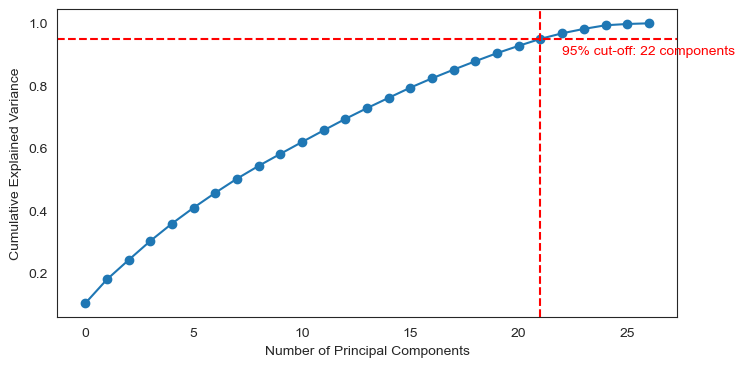

In [121]:
# Required libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select the emotion columns
emotion_columns = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval", 
    "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
    "love", "nervousness", "neutral", "optimism", "pride", "realization",
    "relief", "remorse", "sadness", "surprise"
]
emotion_data = reviews_df[emotion_columns]

# Impute missing values using the mean of each column
imputer = SimpleImputer(strategy='mean')
emotion_data_imputed = imputer.fit_transform(emotion_data)

# Scale the data
scaler = StandardScaler()
emotion_data_scaled = scaler.fit_transform(emotion_data_imputed)

# Apply PCA without reducing dimensionality
pca = PCA()
pca.fit(emotion_data_scaled)

# Calculate cumulative variance explained by the components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1

# Plot the cumulative variance explained
fig = plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components_95 - 1, color='r', linestyle='--')
plt.text(n_components_95, 0.90, '95% cut-off: {} components'.format(n_components_95), color = "red")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Save the plot
fig.savefig('output_files/charts/pca.jpg', format='jpg', dpi=300)

# Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=n_components_95)
emotion_data_pca = pca_optimal.fit_transform(emotion_data_scaled)



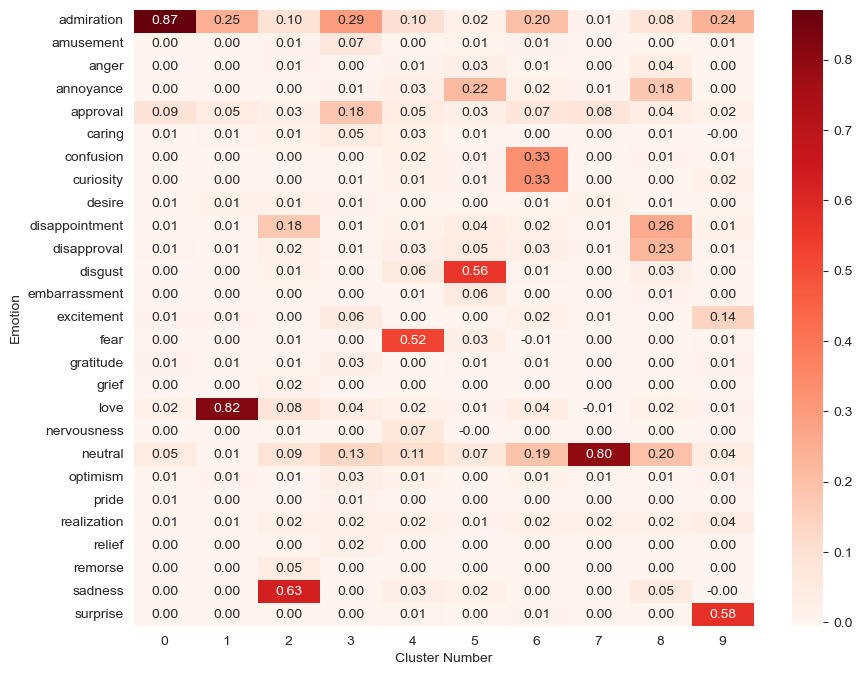

In [122]:
# Perform K-Means clustering with a higher number of clusters and different initialization
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state=42)
kmeans.fit(emotion_data_pca)

# Attach cluster labels to the DataFrame
reviews_df['cluster'] = kmeans.labels_

# Analyze the centroids: map from PCA space back to original space
centroids_pca = kmeans.cluster_centers_  # Cluster centers in PCA space
centroids_original_space = pca_optimal.inverse_transform(centroids_pca)  # Map to scaled space
centroids = pd.DataFrame(scaler.inverse_transform(centroids_original_space), columns=emotion_columns)  # Map to original space
centroids_rounded = centroids.round(3)

# Display the centroids as a heatmap
fig = plt.figure(figsize=(10, 8))
sns.heatmap(centroids_rounded.T, cmap="Reds", annot=True, fmt=".2f")
plt.xlabel('Cluster Number')
plt.ylabel('Emotion')
plt.show()


fig.savefig('output_files/charts/kmeans.jpg', format='jpg', dpi=300)

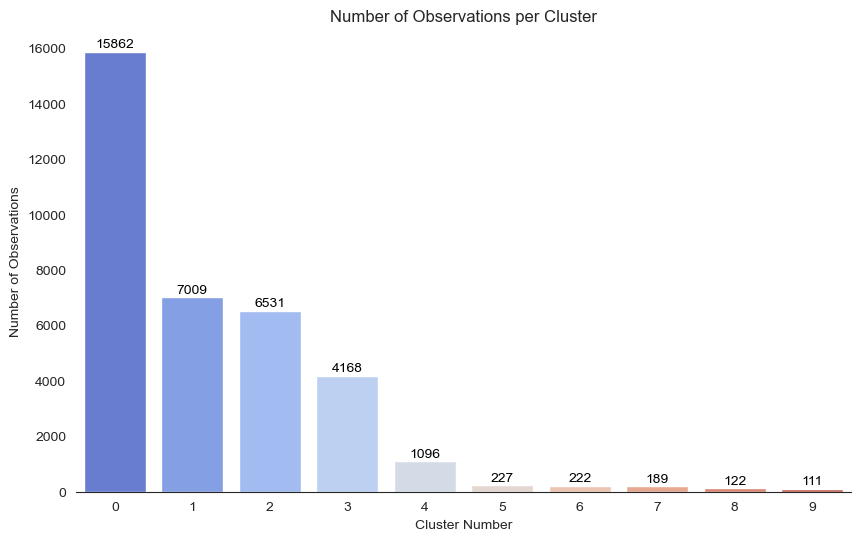

In [123]:
## clsuter counts 
cluster_counts = reviews_df['cluster'].value_counts()

### plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(len(cluster_counts))), y=cluster_counts, palette='coolwarm')
plt.title('Number of Observations per Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)

# Adding the text labels on the bars
for i, v in enumerate(cluster_counts):
    plt.text(i, v + 50, str(v), color='black', ha='center', va='bottom') 
ax = plt.gca() 
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False) 
ax.spines['bottom'].set_visible(True) 
ax.spines['left'].set_visible(False)
plt.show()

# Save the figure
#plt.savefig('output_files/observation_per_cluster.jpg', format='jpg', dpi=300)



### *Mannualy Combine and Name New Emotion Index*

**Discovery (Cluster 6,9):**

Clusters 6 and 9 are primarily characterized by feelings of curiosity (0.33) and confusion (0.33) in Cluster 6, as well as surprise (0.58) in Cluster 9. These clusters suggest a sense of exploration or encountering the unexpected, often associated with discovering new aspects within the park.

**Inspiration (Clusters 1 & 0):**

Cluster 0 is dominated by admiration (0.87) and includes some approval (0.09). This cluster indicates visitors' positive reception and appreciation
Cluster 1 is defined by a high presence of love (0.82), indicating satisfaction and contentment with the park experience. 

**Engagement (Cluster 3):**

Cluster 3 shows a notable presence of approval (0.18) and neutral (0.13) emotions, along with some admiration (0.29). This cluster suggests that visitors often engage with the park in a manner that fosters a sense of calm, admiration, and approval.

**Relaxation (Cluster 7):**

Cluster 7 is mainly neutral (0.81), indicating a calm and relaxed state that visitors often experience in tranquil settings. This cluster suggests engagement with the park in a peaceful, contemplative manner.

**Frustration & Annoyance (Cluster 4,5,8):**

Cluster 4 is primarily characterized by fear (0.52) and disgust (0.06), with some presence of annoyance (0.22). This cluster suggests experiences where visitors encounter elements in the park that evoke fear or discomfort, possibly due to unexpected or unpleasant sights.
Cluster 5 is dominated by disgust (0.56) and includes fear (0.03). This indicates strong negative reactions, potentially due to aspects of the park that visitors find distasteful or unsettling.
Cluster 8 shows a significant presence of disappointment (0.26) and disapproval (0.23), along with a notable sadness (0.20). This cluster reflects situations where park visits fail to meet expectations, leading to negative emotions like disappointment and disapproval.

**Sorrow (Cluster 2):**

Cluster 2 is primarily characterized by a strong presence of sadness (0.63) and some disappointment (0.18). This cluster captures deep, negative emotions, indicating that visitors may experience sorrowful or regretful feelings in certain parts of the park. These emotions might be tied to poignant memories, loss, or unmet expectations during their park visit.

In [124]:
emotion_mapping = {
    0: 'Inspiration',
    1: 'Inspiration',
    2: 'Sorrow',
    3: 'Engagement',
    4: 'Frustration & Annoyance',
    5: 'Frustration & Annoyance',
    6: 'Discovery',
    7: 'Relaxation',
    8: 'Frustration & Annoyance',
    9: 'Discovery'
}

# Apply the mapping to the cluster column to create the new_emotion column
reviews_df['new_emotion'] = reviews_df['cluster'].map(emotion_mapping)

In [125]:
reviews_df.head()

reviews_df.to_csv('output_files/review_sent_emo.csv', index=False)

In [126]:
reviews_df = pd.read_csv('output_files/review_sent_emo.csv')

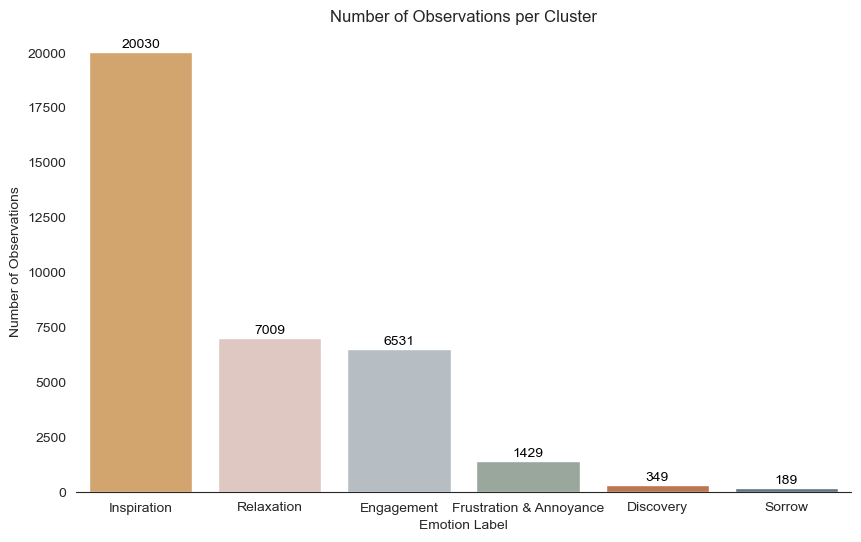

In [127]:
## new clsuter counts 
new_cluster_counts = reviews_df['new_emotion'].value_counts()

# Define the color mapping based on new emotions
color_palette = {
    'Inspiration': '#E2A55E',
    'Relaxation': '#E5C5BD',
    'Frustration & Annoyance': '#96AA9A',
    'Engagement': '#B4BFC5',
    'Discovery': '#CF7041',
    'Sorrow': '#5E718B'
}

# Create a list of colors in the order of the bar plot
colors = [color_palette[emotion] for emotion in new_cluster_counts.index]

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=new_cluster_counts.index, y=new_cluster_counts.values, palette=colors)
plt.title('Number of Observations per Cluster')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)

# Adding the text labels for each bar
for i, v in enumerate(new_cluster_counts):
    plt.text(i, v + 50, str(v), color='black', ha='center', va='bottom') 
ax = plt.gca() 
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False) 
ax.spines['bottom'].set_visible(True) 
ax.spines['left'].set_visible(False)
plt.show()

#plt.savefig('output_files/charts/observation_per_new_cluster.jpg', format='jpg', dpi=300)

In [128]:
reviews_df.head()

,timestamp,author,user_id,review_text,rating,place_id,ParkName,Lat,Long,time,...,optimism,pride,realization,relief,remorse,sadness,surprise,weights,cluster,new_emotion
0,2023-12-30 19:08:54,Eleni Belisonzi,106030427780813104531,A neighbor jewel.,5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-12-30 19:08:54,...,0.001877,0.000380,0.005319,0.000340,0.000415,0.002123,0.001158,0.533349,7,Relaxation
1,2023-08-14 17:51:59,Marta Harrison,116743363301808220011,"visited in a nostalgia trip, as I took my todd...",4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-08-14 17:51:59,...,0.004074,0.014304,0.033353,0.027964,0.000763,0.004404,0.002918,0.410390,3,Engagement
2,2023-06-06 11:43:07,Akshita Srivastava,111921958911249462562,"Hung out in peace, great for solitude lovers",5,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-06-06 11:43:07,...,0.004414,0.010218,0.006221,0.008279,0.000474,0.004261,0.000506,0.359307,0,Inspiration
3,2023-04-20 20:58:42,Andy Reinoso,116446471570828426598,Nice little park in the middle of old historic...,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-04-20 20:58:42,...,0.009164,0.007238,0.011970,0.005709,0.000175,0.001040,0.000501,0.329251,0,Inspiration
4,2023-03-20 22:03:31,Moaaz Marzouk,110355050307790944461,Nice small place for kids,4,ChIJ-5kFm5vIxokR8VHXewCN8eY,Delancey Park,39.94408,-75.1479,2023-03-20 22:03:31,...,0.005207,0.002069,0.005965,0.000588,0.000234,0.000922,0.000758,0.310428,0,Inspiration


In [129]:
# JFK Rosewind

park_name = "John F Kennedy Plaza (LOVE Park)"
jfk_reviews = reviews_df[reviews_df['ParkName'] == park_name]

In [130]:
jfk_reviews.to_csv('output_files/jfk_reviews.csv', index=False)

In [131]:
# Calculate the percentage of each emotion
jfk_emotion_counts = jfk_reviews['new_emotion'].value_counts()
jfk_emotion_percentages = (jfk_emotion_counts / len(jfk_reviews)) * 100

# Select the six emotions you want to include
emotions = ["Relaxation", "Inspiration", "Discovery", "Frustration & Annoyance", "Engagement", "Sorrow"]
jfk_emotion_percentages = jfk_emotion_percentages.reindex(emotions).fillna(0)

In [132]:
# Convert the 'time' column to datetime
jfk_reviews['time'] = pd.to_datetime(jfk_reviews['time'])

# Define summer and winter months
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

# Filter reviews by summer and winter
jfk_summer_reviews = jfk_reviews[jfk_reviews['time'].dt.month.isin(summer_months)]
jfk_winter_reviews = jfk_reviews[jfk_reviews['time'].dt.month.isin(winter_months)]

# Calculate the percentage of each emotion for summer and winter
jfk_summer_counts = jfk_summer_reviews['new_emotion'].value_counts()
jfk_summer_percentages = (jfk_summer_counts / len(jfk_summer_reviews)) * 100
jfk_summer_percentages = jfk_summer_percentages.reindex(emotions).fillna(0)

jfk_winter_counts = jfk_winter_reviews['new_emotion'].value_counts()
jfk_winter_percentages = (jfk_winter_counts / len(jfk_winter_reviews)) * 100
jfk_winter_percentages = jfk_winter_percentages.reindex(emotions).fillna(0)

/var/folders/q1/9z694pbs3cx7p133qs52sh6r0000gn/T/ipykernel_78957/3186337496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jfk_reviews['time'] = pd.to_datetime(jfk_reviews['time'])


In [133]:
print(jfk_emotion_percentages)

Relaxation                 23.219167
Inspiration                52.452163
Discovery                   1.222061
Frustration & Annoyance     5.322399
Engagement                 16.722946
Sorrow                      1.061264
Name: new_emotion, dtype: float64


In [134]:
print(jfk_summer_percentages)

Relaxation                 24.372146
Inspiration                51.997717
Discovery                   1.312785
Frustration & Annoyance     4.851598
Engagement                 16.381279
Sorrow                      1.084475
Name: new_emotion, dtype: float64


In [135]:
print(jfk_winter_percentages)

Relaxation                 19.342672
Inspiration                53.556034
Discovery                   1.293103
Frustration & Annoyance     4.849138
Engagement                 20.204741
Sorrow                      0.754310
Name: new_emotion, dtype: float64


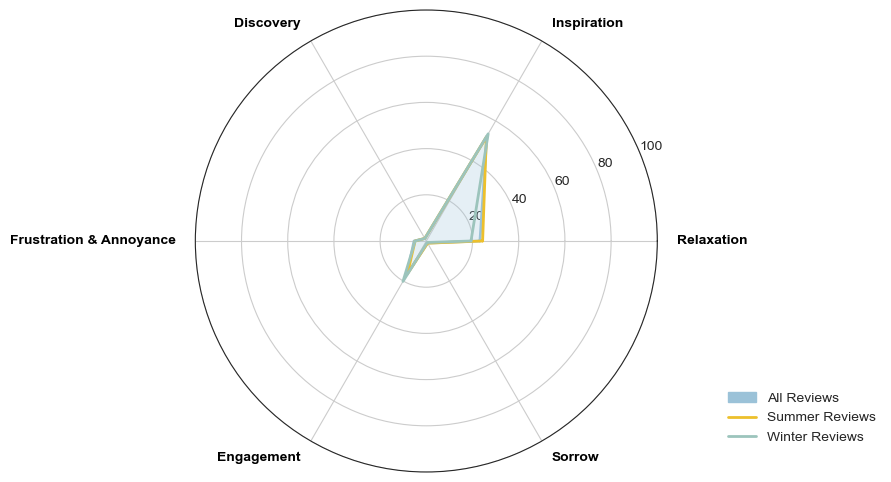

In [136]:
import matplotlib.patches as mpatches

# Function to create radar chart
def add_to_radar(ax, data, angles, label, color, fill=False):
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=label)
    if fill:
        ax.fill(angles, data, color=color, alpha=0.25)

# Set data
labels = np.array(["Relaxation", "Inspiration", "Discovery", "Frustration & Annoyance", "Engagement", "Sorrow"])
num_vars = len(labels)

# Calculate angles for hexagonal setup
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  

all_reviews_data = np.concatenate((jfk_emotion_percentages.values.flatten(), [jfk_emotion_percentages.values[0]]))
summer_data = np.concatenate((jfk_summer_percentages.values.flatten(), [jfk_summer_percentages.values[0]]))
winter_data = np.concatenate((jfk_winter_percentages.values.flatten(), [jfk_winter_percentages.values[0]]))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Adding data series 
add_to_radar(ax, all_reviews_data, angles, 'All Reviews', '#9BC2D8', fill=True)
add_to_radar(ax, summer_data, angles, 'Summer Reviews', '#EDC02C')
add_to_radar(ax, winter_data, angles, 'Winter Reviews', '#9CC4BC')


# Set the labels 
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Adjust labels
left_labels = ["Discovery", "Frustration & Annoyance", "Engagement"]
right_labels = ["Inspiration", "Relaxation", "Sorrow"]

for label, angle in zip(ax.get_xticklabels(), np.degrees(angles[:-1])):
    label.set_fontsize(10)
    label.set_weight('bold')
    label.set_color('black')
    if label.get_text() in left_labels:
        label.set_horizontalalignment('right')
    elif label.get_text() in right_labels:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('center')
    label.set_verticalalignment('center')


# limits and labels
ax.set_ylim(0, 100) 

# Create custom legend handles
all_reviews_patch = mpatches.Patch(color='#9BC2D8', label='All Reviews')
summer_line = plt.Line2D([0], [0], color='#EDC02C', label='Summer Reviews', linewidth=2)
winter_line = plt.Line2D([0], [0], color='#9CC4BC', label='Winter Reviews', linewidth=2)
ax.legend(handles=[all_reviews_patch, summer_line, winter_line], loc='upper right', bbox_to_anchor=(1.5, 0.2),frameon=False)


plt.show()
fig.savefig('output_files/charts/radar_JFK.jpg', format='jpg', dpi=300)

In [137]:
# Hope Park Rosewind

In [138]:
park_name = "Hope Park"
hope_reviews = reviews_df[reviews_df['ParkName'] == park_name]

In [139]:
hope_reviews.to_csv('output_files/hope_reviews.csv', index=False)

In [140]:
# Calculate the percentage of each emotion
hope_emotion_counts = hope_reviews['new_emotion'].value_counts()
hope_emotion_percentages = (hope_emotion_counts / len(hope_reviews)) * 100

# Select the six emotions you want to include
emotions = ["Relaxation", "Inspiration", "Discovery", "Frustration & Annoyance", "Engagement", "Sorrow"]
hope_emotion_percentages = hope_emotion_percentages.reindex(emotions).fillna(0)

In [141]:
# Convert the 'time' column to datetime
hope_reviews['time'] = pd.to_datetime(hope_reviews['time'])

# Define summer and winter months
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

# Filter reviews by summer and winter
hope_summer_reviews = hope_reviews[hope_reviews['time'].dt.month.isin(summer_months)]
hope_winter_reviews = hope_reviews[hope_reviews['time'].dt.month.isin(winter_months)]

# Calculate the percentage of each emotion for summer and winter
hope_summer_counts = hope_summer_reviews['new_emotion'].value_counts()
hope_summer_percentages = (hope_summer_counts / len(hope_summer_reviews)) * 100
hope_summer_percentages = hope_summer_percentages.reindex(emotions).fillna(0)

hope_winter_counts = hope_winter_reviews['new_emotion'].value_counts()
hope_winter_percentages = (hope_winter_counts / len(hope_winter_reviews)) * 100
hope_winter_percentages = hope_winter_percentages.reindex(emotions).fillna(0)

/var/folders/q1/9z694pbs3cx7p133qs52sh6r0000gn/T/ipykernel_78957/2410371343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hope_reviews['time'] = pd.to_datetime(hope_reviews['time'])


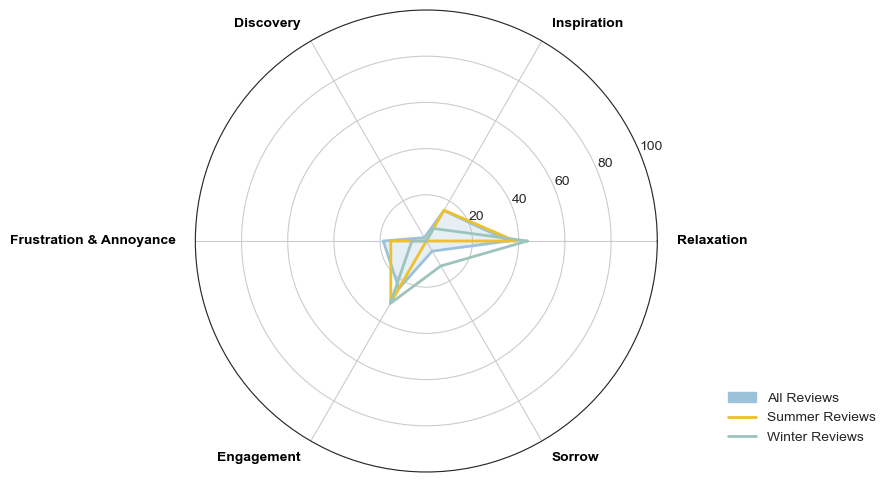

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Function to create radar chart
def add_to_radar(ax, data, angles, label, color, fill=False):
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=label)
    if fill:
        ax.fill(angles, data, color=color, alpha=0.25)

# Set data
labels = np.array(["Relaxation", "Inspiration", "Discovery", "Frustration & Annoyance", "Engagement", "Sorrow"])
num_vars = len(labels)

# Calculate angles for hexagonal setup
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

all_reviews_data = np.concatenate((hope_emotion_percentages.values.flatten(), [hope_emotion_percentages.values[0]]))
summer_data = np.concatenate((hope_summer_percentages.values.flatten(), [hope_summer_percentages.values[0]]))
winter_data = np.concatenate((hope_winter_percentages.values.flatten(), [hope_winter_percentages.values[0]]))

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Adding data series 
add_to_radar(ax, all_reviews_data, angles, 'All Reviews', '#9BC2D8', fill=True)
add_to_radar(ax, summer_data, angles, 'Summer Reviews', '#EDC02C')
add_to_radar(ax, winter_data, angles, 'Winter Reviews', '#9CC4BC')


# Set the labels
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Adjust labels 
left_labels = ["Discovery", "Frustration & Annoyance", "Engagement"]
right_labels = ["Inspiration", "Relaxation", "Sorrow"]

for label, angle in zip(ax.get_xticklabels(), np.degrees(angles[:-1])):
    label.set_fontsize(10)
    label.set_weight('bold')
    label.set_color('black')
    if label.get_text() in left_labels:
        label.set_horizontalalignment('right')
    elif label.get_text() in right_labels:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('center')
    label.set_verticalalignment('center')


# Set limits and labels 
ax.set_ylim(0, 100) 

# Create custom legend handles
all_reviews_patch = mpatches.Patch(color='#9BC2D8', label='All Reviews')
summer_line = plt.Line2D([0], [0], color='#EDC02C', label='Summer Reviews', linewidth=2)
winter_line = plt.Line2D([0], [0], color='#9CC4BC', label='Winter Reviews', linewidth=2)
ax.legend(handles=[all_reviews_patch, summer_line, winter_line], loc='upper right', bbox_to_anchor=(1.5, 0.2),frameon=False)


plt.show()
fig.savefig('output_files/charts/radar_hope.jpg', format='jpg', dpi=300)

## Reviews by Emotion Category over Time

In [143]:
# Ensure 'timestamp' is in datetime format
reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'])

# Now extract year and month
reviews_df['year'] = reviews_df['timestamp'].dt.year
reviews_df['month'] = reviews_df['timestamp'].dt.month


# Define the color mapping based on new emotions
color_palette = {
    'Inspiration': '#E2A55E',
    'Relaxation': '#E5C5BD',
    'Frustration & Annoyance': '#96AA9A',
    'Engagement': '#B4BFC5',
    'Discovery': '#CF7041',
    'Sorrow': '#5E718B'
}

# Group by year and emotion
yearly_counts = reviews_df.groupby(['year', 'new_emotion']).size().unstack(fill_value=0)

monthly_counts = reviews_df.groupby(['month', 'new_emotion']).size().unstack(fill_value=0)

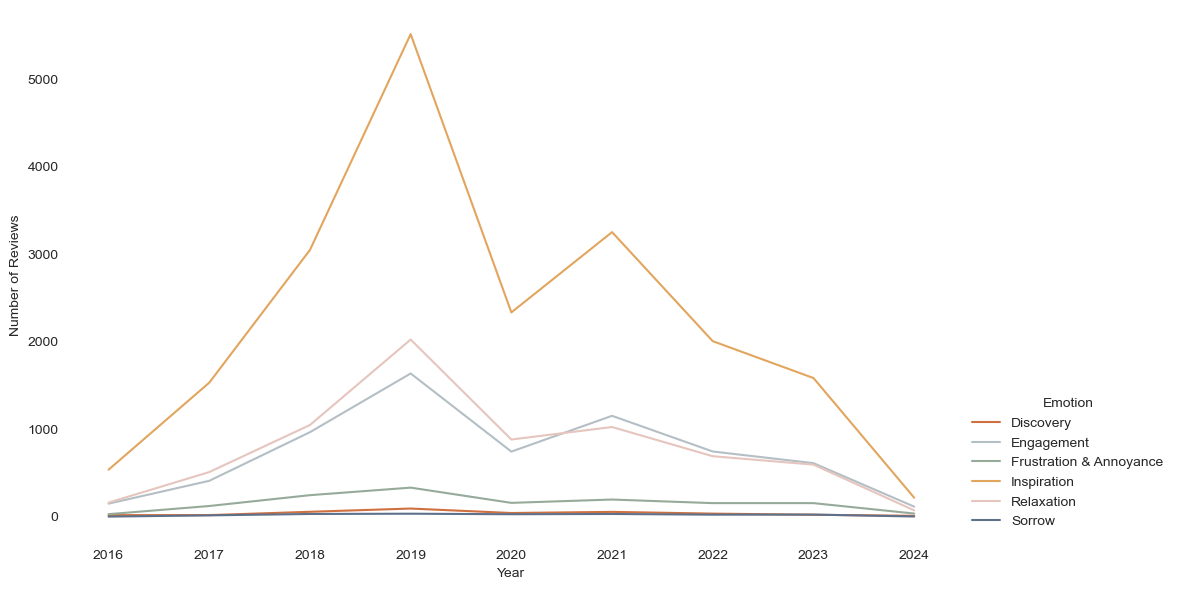

In [144]:
# Function to plot the data
fig, ax = plt.subplots(figsize=(12, 6))
for emotion in yearly_counts.columns:
    ax.plot(yearly_counts.index, yearly_counts[emotion], label=emotion, color=color_palette[emotion])

# Customizing the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')
#ax.set_title('Yearly Review Counts by Emotion')
ax.legend(title='Emotion', loc='lower right', bbox_to_anchor=(1.25,0), frameon=False)
sns.despine(left=True, bottom=True, right=True, top=True) 
plt.grid(False)
plt.tight_layout() 

fig.savefig('output_files/charts/emotion over year.jpg', format='jpg', dpi=300)

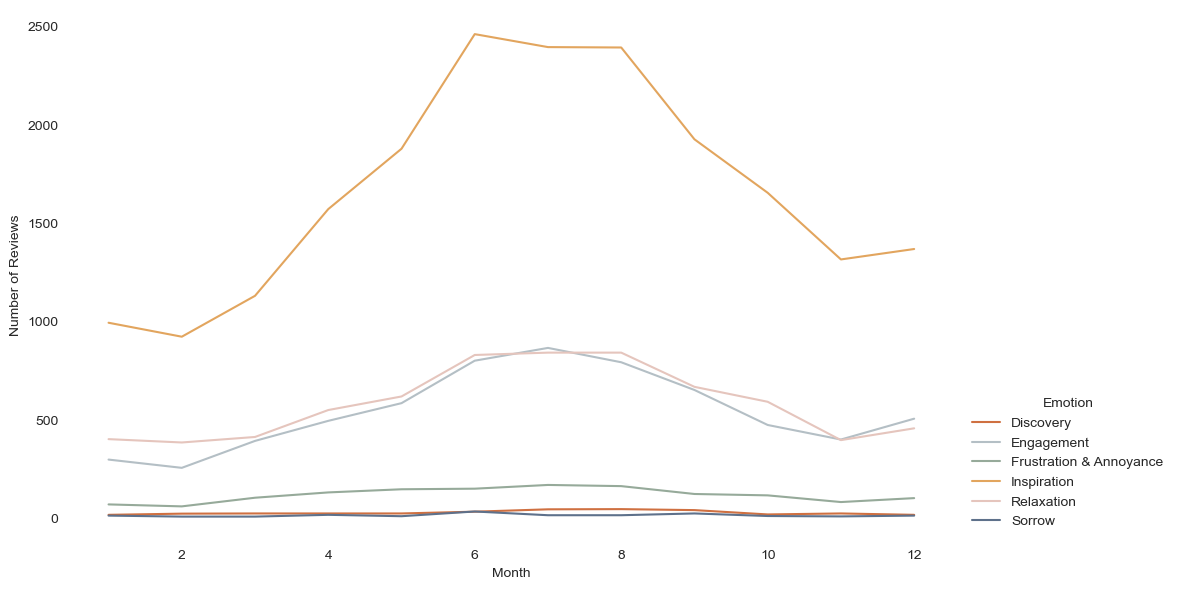

In [145]:
import calendar

fig, ax = plt.subplots(figsize=(12, 6))
for emotion in monthly_counts.columns:
    ax.plot(monthly_counts.index, monthly_counts[emotion], label=emotion, color=color_palette[emotion])

# Customizing the plot
ax.set_xlabel('Month')
ax.set_ylabel('Number of Reviews')
#ax.set_title('Yearly Review Counts by Emotion')
ax.legend(title='Emotion', loc='lower right', bbox_to_anchor=(1.25,0), frameon=False)
sns.despine(left=True, bottom=True, right=True, top=True) 
plt.grid(False)
plt.tight_layout() 
plt.xticks(rotation=0) 

fig.savefig('output_files/charts/emotion over month.jpg', format='jpg', dpi=300)

## Emtion by Park Function

In [146]:
print(reviews_df['ParkName'].unique())

['Delancey Park' 'Mifflin Square' 'William Lanier Park'
 'Marian Winfield Hissey Recreation Center' 'Palmer Park' 'Disston Park'
 'Sedgley Woods Disc Golf Course' 'Schuylkill Banks' 'Pleasant Hill Park'
 'Sherwood Park' 'Hunting Park' 'Schuylkill River Park' 'Carroll Park'
 'Jose Manuel Collazo Park' 'Norman (Butch) Ellis Playground' 'Hope Park'
 'Vernon Park' 'Tacony Creek Park' 'Belmont Plateau'
 'Joseph C Fluehr Memorial Park' 'East Fairmount Park' 'Manayunk Canal'
 'Konrad Square' 'Burholme Park' 'McMichael Park' 'Pretzel Park'
 'Norris Square' 'Logan Square' 'William Lanier Playground'
 'Matthias Baldwin Park' 'Clarence H Clark Park' 'Cliveden Park'
 'Juniata Park' 'Lardners Point Park' 'Rail Park' 'Grays Ferry Crescent'
 'Russell DeRitis Playground' 'Verree and Susquehanna Playground'
 'Korean War Veterans Memorial' 'Frankford and Solly Playground'
 'Blue Bell Park' 'Pennypack on the Delaware' 'Glendinning Rock Garden'
 'Fernhill Park' 'Emanuel Weinberg Park' 'Belmont and Edgley 

In [147]:
def define_function(park_name):
    if isinstance(park_name, str):
        lower_park_name = park_name.lower()
        if 'playground' in lower_park_name or 'field' in lower_park_name :
            return 'Playground'
        elif 'court' in lower_park_name or 'tennis' in lower_park_name:
            return 'Sport Court'
        elif 'banks' in lower_park_name or 'river' in lower_park_name or 'creek' in lower_park_name:
            return 'Watershed Park'
        elif 'memorial' in lower_park_name:
            return 'Memorial Park'
        elif 'square' in lower_park_name or 'plaza' in lower_park_name :
            return 'Plaza'
        elif 'valley' in lower_park_name or 'wood' in lower_park_name or 'hill' in lower_park_name :
            return 'Natural Reservation'
        else:
            return 'Regular'

reviews_df['Function'] = reviews_df['ParkName'].apply(define_function)

In [148]:
# Group data by 'Function' and 'new_emotion', and count occurrences
function_emotion_counts = reviews_df.groupby(['Function', 'new_emotion']).size().unstack(fill_value=0)

# Normalize the data by function totals to compare proportions
function_emotion_proportions = function_emotion_counts.div(function_emotion_counts.sum(axis=1), axis=0) * 100

In [149]:
function_emotion_proportions.reset_index(inplace=True)
melted_data = function_emotion_proportions.melt(id_vars='Function', var_name='Emotion', value_name='Percentage')

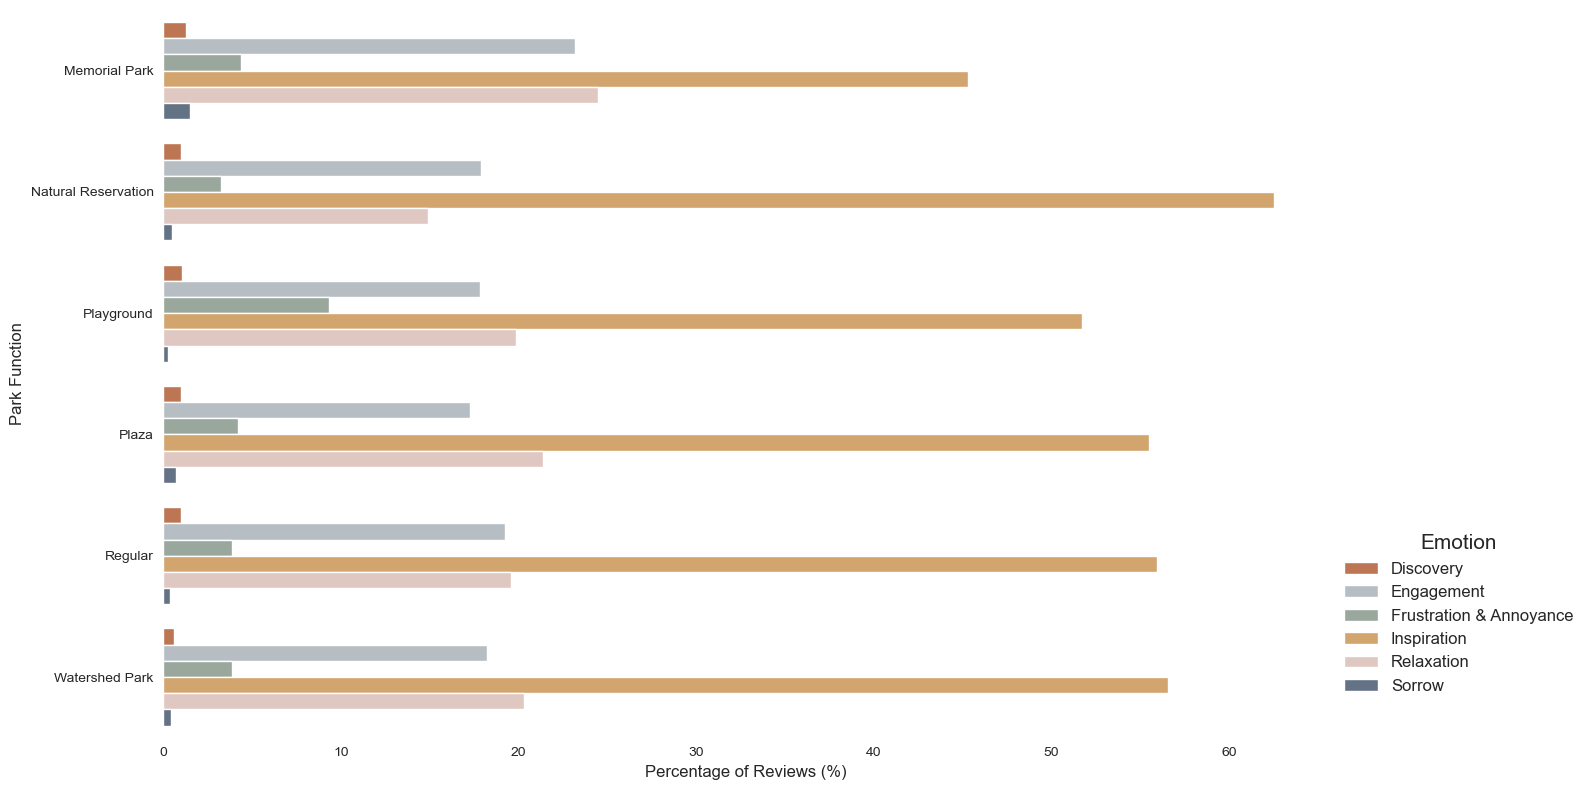

In [150]:
# Create a grouped bar chart
fig=plt.figure(figsize=(16, 8))
barplot = sns.barplot(y='Function', x='Percentage', hue='Emotion', data=melted_data, palette=color_palette)
#plt.title('Emotion Distribution by Park Function')
plt.ylabel('Park Function',fontsize=12)
plt.xlabel('Percentage of Reviews (%)',fontsize=12)
plt.legend(title='Emotion',title_fontsize=15, bbox_to_anchor=(1, 0.3), frameon=False,fontsize=12)
sns.despine(left=True, bottom=True, right=True, top=True) 
plt.grid(False)
plt.tight_layout()  
plt.show()

fig.savefig('output_files/charts/emo_by_function.jpg', format='jpg', dpi=300)

## Parks with Emotion Lables

### *Emotion Maps*

In [151]:
park_cluster_counts = reviews_df.groupby(['ParkName', 'new_emotion']).size().unstack(fill_value=0)

# Calculate the percentages
park_cluster_percentages = park_cluster_counts.div(park_cluster_counts.sum(axis=1), axis=0) * 100

# Rename the columns to include '_percentage'
park_cluster_percentages.columns = [f'{emotion}_percentage' for emotion in park_cluster_percentages.columns]

# Round the percentages and check the first few rows
park_emo = park_cluster_percentages.round(2)
park_emo.head()


,Discovery_percentage,Engagement_percentage,Frustration & Annoyance_percentage,Inspiration_percentage,Relaxation_percentage,Sorrow_percentage
ParkName,,,,,,
29th and Chalmers Playground,0.00,18.58,10.62,42.48,27.43,0.88
Bartrams Mile Trail Greenway (56th),3.57,25.00,0.00,53.57,17.86,0.00
Belmont Grove,3.12,12.50,6.25,65.62,12.50,0.00
Belmont Plateau,0.35,18.08,3.71,61.07,16.69,0.12
Belmont and Edgley Fields,6.45,6.45,6.45,48.39,32.26,0.00


In [152]:
park_plot = park_plot.merge(park_emo, on='ParkName', how='left')

park_plot.head()

park_plot = gpd.GeoDataFrame(
    park_plot, 
    geometry=gpd.points_from_xy(park_plot['Long'], park_plot['Lat'])
)

# Set the original CRS for the GeoDataFrame
park_plot.set_crs('EPSG:4326', inplace=True)


,ParkName,Long,Lat,review_count_by_park,geometry,size_category,sentiment,weighted_average_sentiment,Discovery_percentage,Engagement_percentage,Frustration & Annoyance_percentage,Inspiration_percentage,Relaxation_percentage,Sorrow_percentage
0,Julian Abele Park,-75.179268,39.940884,47,POINT (-75.17927 39.94088),50,0.645137,0.689037,2.13,17.02,6.38,53.19,17.02,4.26
1,Campbell Square,-75.103270,39.986360,206,POINT (-75.10327 39.98636),100,0.680962,0.739969,0.00,17.96,3.88,56.80,20.87,0.49
2,Eakins Oval,-75.178359,39.963627,165,POINT (-75.17836 39.96363),100,0.677188,0.452558,1.82,19.39,2.42,52.73,23.64,0.00
3,Sister Cities Park,-75.169340,39.957910,718,POINT (-75.16934 39.95791),200,0.897785,0.838859,0.28,21.73,1.67,60.45,15.88,0.00
4,Sister Clara Muhammad Square,-75.169339,39.957906,718,POINT (-75.16934 39.95791),200,0.897785,0.838859,0.28,21.73,1.67,60.45,15.88,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Fanny Kemble Abolitionist Memorial Park,-75.149800,40.039980,76,POINT (-75.14980 40.03998),50,0.414379,0.556841,2.63,22.37,7.89,34.21,32.89,0.00
88,Colonel Thomas J Powers Park,-75.108931,39.982504,51,POINT (-75.10893 39.98250),50,0.694239,0.529361,0.00,13.73,0.00,58.82,27.45,0.00
89,Clarence H Clark Park,-75.210414,39.948897,1216,POINT (-75.21041 39.94890),250,0.834137,0.819071,0.58,19.08,2.63,60.94,16.78,0.00
90,John F Kennedy Plaza (LOVE Park),-75.165640,39.954132,6219,POINT (-75.16564 39.95413),250,0.634442,0.603827,1.22,16.72,5.32,52.45,23.22,1.06


In [153]:
print(park_emo.columns)

Index(['Discovery_percentage', 'Engagement_percentage',
       'Frustration & Annoyance_percentage', 'Inspiration_percentage',
       'Relaxation_percentage', 'Sorrow_percentage'],
      dtype='object')


In [154]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.colors as mcolors

In [155]:
weighted_counts = reviews_df.groupby(['ParkName', 'new_emotion']).apply(
    lambda x: (x['weights']).sum()
).unstack(fill_value=0)

# Calculate the total weights per park to normalize
total_weights_per_park_weighted = weighted_counts.sum(axis=1)

# Calculate weighted percentages
park_cluster_percentages_weighted = weighted_counts.div(total_weights_per_park_weighted, axis=0) * 100

# Rename the columns to include '_percentage'
park_cluster_percentages_weighted.columns = [f'{emotion}_percentage_weighted' for emotion in park_cluster_percentages_weighted.columns]

# Round the percentages and check the first few rows
park_emo_weighted = park_cluster_percentages_weighted.round(2)

In [156]:
park_emo_weighted.head()

,Discovery_percentage_weighted,Engagement_percentage_weighted,Frustration & Annoyance_percentage_weighted,Inspiration_percentage_weighted,Relaxation_percentage_weighted,Sorrow_percentage_weighted
ParkName,,,,,,
29th and Chalmers Playground,0.00,17.75,7.26,36.33,38.59,0.07
Bartrams Mile Trail Greenway (56th),0.40,26.71,0.00,41.15,31.75,0.00
Belmont Grove,0.45,18.85,1.59,62.82,16.29,0.00
Belmont Plateau,0.53,20.57,3.74,59.58,15.37,0.20
Belmont and Edgley Fields,3.42,6.57,16.59,43.47,29.95,0.00


In [157]:
park_plot = park_plot.merge(park_emo_weighted, on='ParkName', how='left')

park_plot.head()

park_plot = gpd.GeoDataFrame(
    park_plot, 
    geometry=gpd.points_from_xy(park_plot['Long'], park_plot['Lat'])
)

# Set the original CRS for the GeoDataFrame
park_plot.set_crs('EPSG:4326', inplace=True)

,ParkName,Long,Lat,review_count_by_park,geometry,size_category,sentiment,weighted_average_sentiment,Discovery_percentage,Engagement_percentage,Frustration & Annoyance_percentage,Inspiration_percentage,Relaxation_percentage,Sorrow_percentage,Discovery_percentage_weighted,Engagement_percentage_weighted,Frustration & Annoyance_percentage_weighted,Inspiration_percentage_weighted,Relaxation_percentage_weighted,Sorrow_percentage_weighted
0,Julian Abele Park,-75.179268,39.940884,47,POINT (-75.17927 39.94088),50,0.645137,0.689037,2.13,17.02,6.38,53.19,17.02,4.26,3.57,30.77,8.17,26.06,25.59,5.84
1,Campbell Square,-75.103270,39.986360,206,POINT (-75.10327 39.98636),100,0.680962,0.739969,0.00,17.96,3.88,56.80,20.87,0.49,0.00,21.18,0.72,60.71,17.25,0.14
2,Eakins Oval,-75.178359,39.963627,165,POINT (-75.17836 39.96363),100,0.677188,0.452558,1.82,19.39,2.42,52.73,23.64,0.00,5.42,29.52,1.15,44.76,19.15,0.00
3,Sister Cities Park,-75.169340,39.957910,718,POINT (-75.16934 39.95791),200,0.897785,0.838859,0.28,21.73,1.67,60.45,15.88,0.00,0.07,21.36,5.88,60.07,12.62,0.00
4,Sister Clara Muhammad Square,-75.169339,39.957906,718,POINT (-75.16934 39.95791),200,0.897785,0.838859,0.28,21.73,1.67,60.45,15.88,0.00,0.07,21.36,5.88,60.07,12.62,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Fanny Kemble Abolitionist Memorial Park,-75.149800,40.039980,76,POINT (-75.14980 40.03998),50,0.414379,0.556841,2.63,22.37,7.89,34.21,32.89,0.00,2.12,18.95,6.03,44.62,28.28,0.00
88,Colonel Thomas J Powers Park,-75.108931,39.982504,51,POINT (-75.10893 39.98250),50,0.694239,0.529361,0.00,13.73,0.00,58.82,27.45,0.00,0.00,7.36,0.00,62.37,30.27,0.00
89,Clarence H Clark Park,-75.210414,39.948897,1216,POINT (-75.21041 39.94890),250,0.834137,0.819071,0.58,19.08,2.63,60.94,16.78,0.00,0.61,20.51,2.92,61.40,14.56,0.00
90,John F Kennedy Plaza (LOVE Park),-75.165640,39.954132,6219,POINT (-75.16564 39.95413),250,0.634442,0.603827,1.22,16.72,5.32,52.45,23.22,1.06,1.14,18.22,5.36,49.56,24.80,0.92


In [158]:
emotion_columns = ['Discovery_percentage_weighted', 'Engagement_percentage_weighted', 'Frustration & Annoyance_percentage_weighted', 
                   'Inspiration_percentage_weighted', 'Relaxation_percentage_weighted', 'Sorrow_percentage_weighted']

park_plot['Dominant_Emotion_weighted'] = park_plot[emotion_columns].idxmax(axis=1).str.replace('_percentage_weighted', '')

park_plot.head()

,ParkName,Long,Lat,review_count_by_park,geometry,size_category,sentiment,weighted_average_sentiment,Discovery_percentage,Engagement_percentage,...,Inspiration_percentage,Relaxation_percentage,Sorrow_percentage,Discovery_percentage_weighted,Engagement_percentage_weighted,Frustration & Annoyance_percentage_weighted,Inspiration_percentage_weighted,Relaxation_percentage_weighted,Sorrow_percentage_weighted,Dominant_Emotion_weighted
0,Julian Abele Park,-75.179268,39.940884,47,POINT (-75.17927 39.94088),50,0.645137,0.689037,2.13,17.02,...,53.19,17.02,4.26,3.57,30.77,8.17,26.06,25.59,5.84,Engagement
1,Campbell Square,-75.103270,39.986360,206,POINT (-75.10327 39.98636),100,0.680962,0.739969,0.00,17.96,...,56.80,20.87,0.49,0.00,21.18,0.72,60.71,17.25,0.14,Inspiration
2,Eakins Oval,-75.178359,39.963627,165,POINT (-75.17836 39.96363),100,0.677188,0.452558,1.82,19.39,...,52.73,23.64,0.00,5.42,29.52,1.15,44.76,19.15,0.00,Inspiration
3,Sister Cities Park,-75.169340,39.957910,718,POINT (-75.16934 39.95791),200,0.897785,0.838859,0.28,21.73,...,60.45,15.88,0.00,0.07,21.36,5.88,60.07,12.62,0.00,Inspiration
4,Sister Clara Muhammad Square,-75.169339,39.957906,718,POINT (-75.16934 39.95791),200,0.897785,0.838859,0.28,21.73,...,60.45,15.88,0.00,0.07,21.36,5.88,60.07,12.62,0.00,Inspiration


In [159]:
park_plot.to_csv('output_files/processing/parkplot_sent_emo.csv', index=False)

In [160]:
def map_size_category(x):
    # Define custom breaks and corresponding sizes
    breaks = [0, 100, 250, 500, 1000,  max(park_plot['review_count_by_park'])]
    sizes = [50, 100, 150, 200, 250]

    for i, break_point in enumerate(breaks[:-1]):
        if x <= breaks[i+1]:
            return sizes[i]
    return sizes[-1]

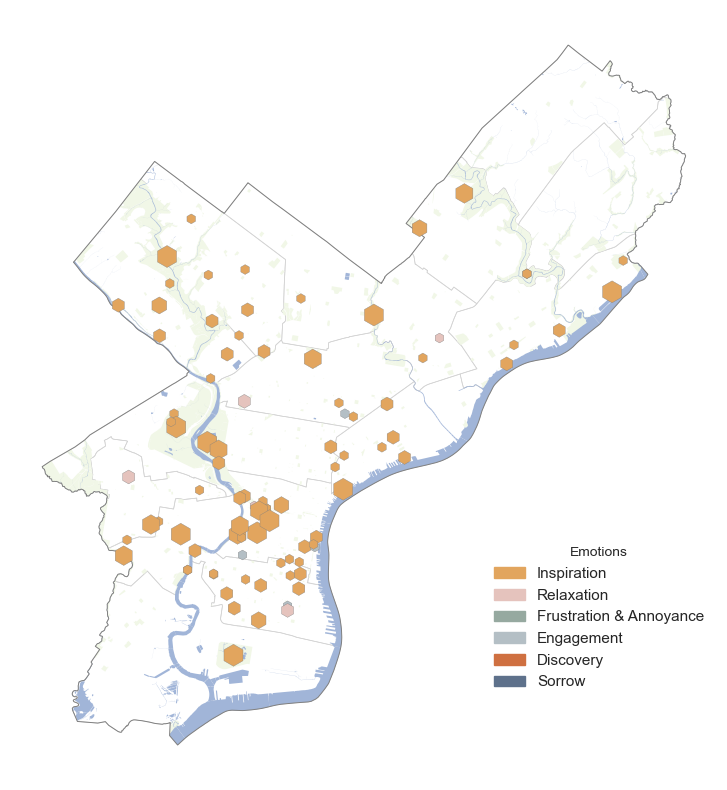

In [161]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.5)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#A1B5D8', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

color_palette = {
    'Inspiration': '#E2A55E',
    'Relaxation': '#E5C3BD',
    'Frustration & Annoyance': '#96A9A0',
    'Engagement': '#B4BFC5',
    'Discovery': '#CF7041',
    'Sorrow': '#5E718B'
}


colors = [color_palette[emotion] for emotion in park_plot['Dominant_Emotion_weighted']]

# Plot each emotion as a separate scatter plot
scatter = ax.scatter(
    park_plot['Long'], park_plot['Lat'], 
    c=colors,  
    s=park_plot['review_count_by_park'].apply(map_size_category),
    edgecolor='grey', linewidth=0.25, marker='h',label=label
)

# Customize the plot
#plt.title('Weighted Dominant Emotion Mapping', fontsize=20)
#plt.figtext(0.5, 0.85, 'Point size represents number of reviews', wrap=True, horizontalalignment='center', fontsize=15)
#plt.figtext(0.5, 0.85, 'Mapping of Emotions Across the City', wrap=True, horizontalalignment='center', fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
sns.despine(left=True, bottom=True, right=True, top=True)

# Add a legend
import matplotlib.patches as mpatches
legend_handles = [mpatches.RegularPolygon((0.5, 0.5), numVertices=6, radius=0.1, orientation=np.pi/6, color=color, label=label) for label, color in color_palette.items()]
ax.legend(handles=legend_handles, title='Emotions', fontsize=11, loc='lower right', bbox_to_anchor=(1, 0.1), frameon=False)

plt.show()
fig.savefig('output_files/maps/domi.jpg', format='jpg', dpi=300)

### *map that express not only the dominant emotions in general but also the the dominant emotion every month*


### *map by emotion*

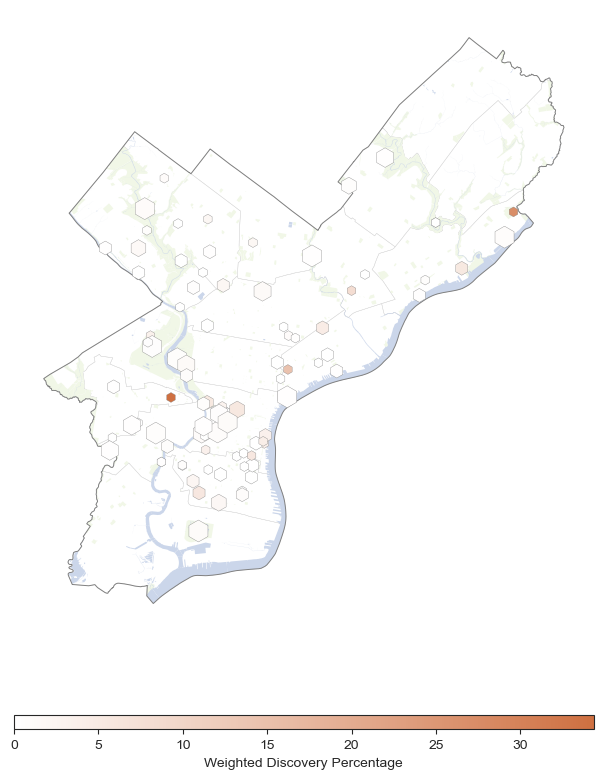

In [162]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Discovery_percentage_weighted'].min(), vmax=park_plot['Discovery_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Discovery_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#CF7041']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#CF7041']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Discovery Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/disc_w.jpg', format='jpg', dpi=300)

In [166]:
from matplotlib import gridspec
from matplotlib.colorbar import ColorbarBase

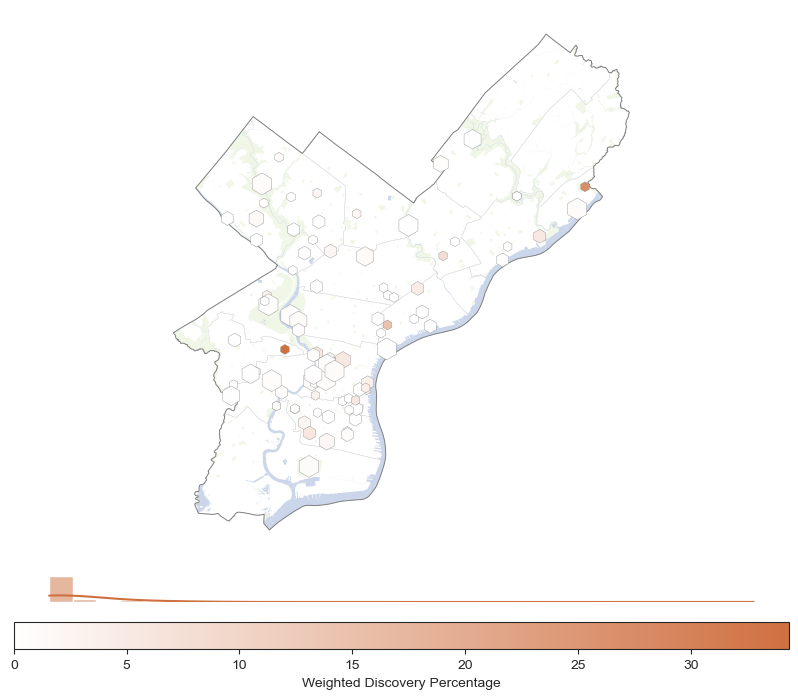

In [167]:
sns.set_style('white')

# Set up the main plot with map and color bar
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 1, height_ratios=[20, 1, 1])  # Main plot, distribution, and color bar
ax_map = fig.add_subplot(gs[0])
ax_dist = fig.add_subplot(gs[1])
ax_colorbar = fig.add_subplot(gs[2])

# Plot the map
planning_districts.plot(ax=ax_map, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax_map, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax_map, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax_map, color='none', edgecolor='grey', linewidth=0.7)

# Remove latitude and longitude labels
sns.despine(left=True, bottom=True, right=True, top=True)
ax_map.set_xlabel("")
ax_map.set_ylabel("")
ax_map.set_xticks([])
ax_map.set_yticks([])

# Normalize color map
norm = mcolors.Normalize(vmin=park_plot['Discovery_percentage_weighted'].min(), 
                         vmax=park_plot['Discovery_percentage_weighted'].max())

# Create scatter plot with hexagonal markers and scaled sizes
scatter = ax_map.scatter(
    park_plot['Long'], park_plot['Lat'],
    c=park_plot['Discovery_percentage_weighted'],
    s=park_plot['review_count_by_park'].apply(map_size_category),
    edgecolor='grey', linewidth=0.25, marker='h',
    cmap=LinearSegmentedColormap.from_list("custom_Discovery", ['#ffffff', '#CF7041']),  # Custom colors
    norm=norm
)

# Plot value distribution as a histogram in ax_dist
sns.histplot(park_plot['Discovery_percentage_weighted'], bins=30, kde=True, ax=ax_dist, color='#CF7041')
ax_dist.set_xlabel("")  
ax_dist.set_ylabel("")  
ax_dist.set_xticks([])  
ax_dist.set_yticks([])  
ax_dist.spines['top'].set_visible(False)
ax_dist.spines['right'].set_visible(False)
ax_dist.spines['left'].set_visible(False)

# Manually adjust the position of the histogram - not working - will do it in photoshop
#plt.subplots_adjust(bottom=0, top=0.25, hspace=0)

# Color bar setup in ax_colorbar
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_Discovery", ['#ffffff', '#CF7041']), norm=norm)
cb = ColorbarBase(ax=ax_colorbar, cmap=sm.cmap, norm=norm, orientation='horizontal')
cb.set_label('Weighted Discovery Percentage')

# Adjust layout for tighter spacing if needed
plt.subplots_adjust(bottom=0.05, top=0.85, hspace=0.1)
plt.show()
fig.savefig('output_files/maps/Disc_w_new.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')

# Set up the main plot with map and color bar
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 1, height_ratios=[20, 1, 1])  # Main plot, distribution, and color bar
ax_map = fig.add_subplot(gs[0])
ax_dist = fig.add_subplot(gs[1])
ax_colorbar = fig.add_subplot(gs[2])

# Plot the map
planning_districts.plot(ax=ax_map, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax_map, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax_map, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax_map, color='none', edgecolor='grey', linewidth=0.7)

# Remove latitude and longitude labels
sns.despine(left=True, bottom=True, right=True, top=True)
ax_map.set_xlabel("")
ax_map.set_ylabel("")
ax_map.set_xticks([])
ax_map.set_yticks([])

# Normalize color map
norm = mcolors.Normalize(vmin=park_plot['Inspiration_percentage_weighted'].min(), 
                         vmax=park_plot['Inspiration_percentage_weighted'].max())

# Create scatter plot with hexagonal markers and scaled sizes
scatter = ax_map.scatter(
    park_plot['Long'], park_plot['Lat'],
    c=park_plot['Inspiration_percentage_weighted'],
    s=park_plot['review_count_by_park'].apply(map_size_category),
    edgecolor='grey', linewidth=0.25, marker='h',
    cmap=LinearSegmentedColormap.from_list("custom_inspiration", ['#ffffff', '#D88C46']),  # Custom colors
    norm=norm
)

# Plot value distribution as a histogram in ax_dist
sns.histplot(park_plot['Inspiration_percentage_weighted'], bins=30, kde=True, ax=ax_dist, color="#D88C46")
ax_dist.set_xlabel("")  
ax_dist.set_ylabel("")  
ax_dist.set_xticks([])  
ax_dist.set_yticks([])  
ax_dist.spines['top'].set_visible(False)
ax_dist.spines['right'].set_visible(False)
ax_dist.spines['left'].set_visible(False)

# Manually adjust the position of the histogram - not working - will do it in photoshop
plt.subplots_adjust(bottom=0, top=0.25, hspace=0)

# Color bar setup in ax_colorbar
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_inspiration", ['#ffffff', '#D88C46']), norm=norm)
cb = ColorbarBase(ax=ax_colorbar, cmap=sm.cmap, norm=norm, orientation='horizontal')
cb.set_label('Weighted Inspiration Percentage')

# Adjust layout for tighter spacing if needed
plt.subplots_adjust(bottom=0.05, top=0.85, hspace=0.1)
plt.show()
fig.savefig('output_files/maps/insp_w_new.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Inspiration_percentage_weighted'].min(), vmax=park_plot['Inspiration_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Inspiration_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#E2A55E']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#E2A55E']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Inspiration Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/insp_w.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Relaxation_percentage_weighted'].min(), vmax=park_plot['Relaxation_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Relaxation_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#E5C5BD']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#E5C5BD']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Relaxation Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/rex_w.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')

# Set up the main plot with map and color bar
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 1, height_ratios=[20, 1, 1])  # Main plot, distribution, and color bar
ax_map = fig.add_subplot(gs[0])
ax_dist = fig.add_subplot(gs[1])
ax_colorbar = fig.add_subplot(gs[2])

# Plot the map
planning_districts.plot(ax=ax_map, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax_map, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax_map, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax_map, color='none', edgecolor='grey', linewidth=0.7)

# Remove latitude and longitude labels
sns.despine(left=True, bottom=True, right=True, top=True)
ax_map.set_xlabel("")
ax_map.set_ylabel("")
ax_map.set_xticks([])
ax_map.set_yticks([])

# Normalize color map
norm = mcolors.Normalize(vmin=park_plot['Relaxation_percentage_weighted'].min(), 
                         vmax=park_plot['Relaxation_percentage_weighted'].max())

# Create scatter plot with hexagonal markers and scaled sizes
scatter = ax_map.scatter(
    park_plot['Long'], park_plot['Lat'],
    c=park_plot['Relaxation_percentage_weighted'],
    s=park_plot['review_count_by_park'].apply(map_size_category),
    edgecolor='grey', linewidth=0.25, marker='h',
    cmap=LinearSegmentedColormap.from_list("custom_Relaxation", ['#ffffff', '#E5C5BD']),  # Custom colors
    norm=norm
)

# Plot value distribution as a histogram in ax_dist
sns.histplot(park_plot['Relaxation_percentage_weighted'], bins=30, kde=True, ax=ax_dist, color='#E5C5BD')
ax_dist.set_xlabel("")  
ax_dist.set_ylabel("")  
ax_dist.set_xticks([])  
ax_dist.set_yticks([])  
ax_dist.spines['top'].set_visible(False)
ax_dist.spines['right'].set_visible(False)
ax_dist.spines['left'].set_visible(False)

# Manually adjust the position of the histogram - not working - will do it in photoshop
plt.subplots_adjust(bottom=0, top=0.25, hspace=0)

# Color bar setup in ax_colorbar
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_Relaxation", ['#ffffff', '#E5C5BD']), norm=norm)
cb = ColorbarBase(ax=ax_colorbar, cmap=sm.cmap, norm=norm, orientation='horizontal')
cb.set_label('Weighted Relaxation Percentage')

# Adjust layout for tighter spacing if needed
plt.subplots_adjust(bottom=0.05, top=0.85, hspace=0.1)
plt.show()
fig.savefig('output_files/maps/relx_w_new.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Engagement_percentage_weighted'].min(), vmax=park_plot['Engagement_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Engagement_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#B4BFC5']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#B4BFC5']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Engagement Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/eng_w.jpg', format='jpg', dpi=300)

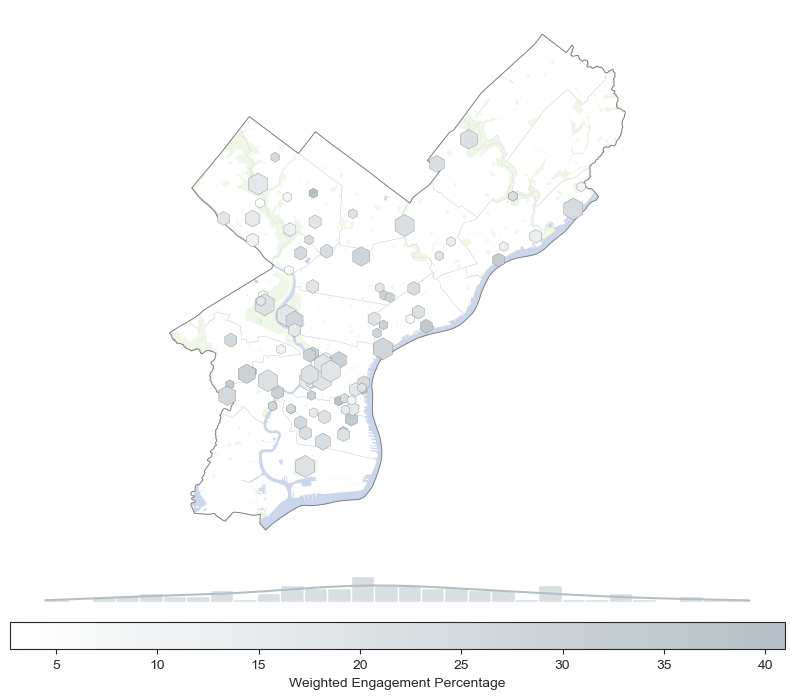

In [174]:
sns.set_style('white')

# Set up the main plot with map and color bar
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 1, height_ratios=[20, 1, 1])  # Main plot, distribution, and color bar
ax_map = fig.add_subplot(gs[0])
ax_dist = fig.add_subplot(gs[1])
ax_colorbar = fig.add_subplot(gs[2])

# Plot the map
planning_districts.plot(ax=ax_map, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax_map, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax_map, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax_map, color='none', edgecolor='grey', linewidth=0.7)

# Remove latitude and longitude labels
sns.despine(left=True, bottom=True, right=True, top=True)
ax_map.set_xlabel("")
ax_map.set_ylabel("")
ax_map.set_xticks([])
ax_map.set_yticks([])

# Normalize color map
norm = mcolors.Normalize(vmin=park_plot['Engagement_percentage_weighted'].min(), 
                         vmax=park_plot['Engagement_percentage_weighted'].max())

# Create scatter plot with hexagonal markers and scaled sizes
scatter = ax_map.scatter(
    park_plot['Long'], park_plot['Lat'],
    c=park_plot['Engagement_percentage_weighted'],
    s=park_plot['review_count_by_park'].apply(map_size_category),
    edgecolor='grey', linewidth=0.25, marker='h',
    cmap=LinearSegmentedColormap.from_list("custom_Engagement", ['#ffffff', '#B4BFC5']),  # Custom colors
    norm=norm
)

# Plot value distribution as a histogram in ax_dist
sns.histplot(park_plot['Engagement_percentage_weighted'], bins=30, kde=True, ax=ax_dist, color='#B4BFC5')
ax_dist.set_xlabel("")  
ax_dist.set_ylabel("")  
ax_dist.set_xticks([])  
ax_dist.set_yticks([])  
ax_dist.spines['top'].set_visible(False)
ax_dist.spines['right'].set_visible(False)
ax_dist.spines['left'].set_visible(False)

# Manually adjust the position of the histogram - not working - will do it in photoshop
plt.subplots_adjust(bottom=0, top=0.25, hspace=0)

# Color bar setup in ax_colorbar
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_Engagement", ['#ffffff', '#B4BFC5']), norm=norm)
cb = ColorbarBase(ax=ax_colorbar, cmap=sm.cmap, norm=norm, orientation='horizontal')
cb.set_label('Weighted Engagement Percentage')

# Adjust layout for tighter spacing if needed
plt.subplots_adjust(bottom=0.05, top=0.85, hspace=0.1)
plt.show()
fig.savefig('output_files/maps/eng_w_new.jpg', format='jpg', dpi=300)

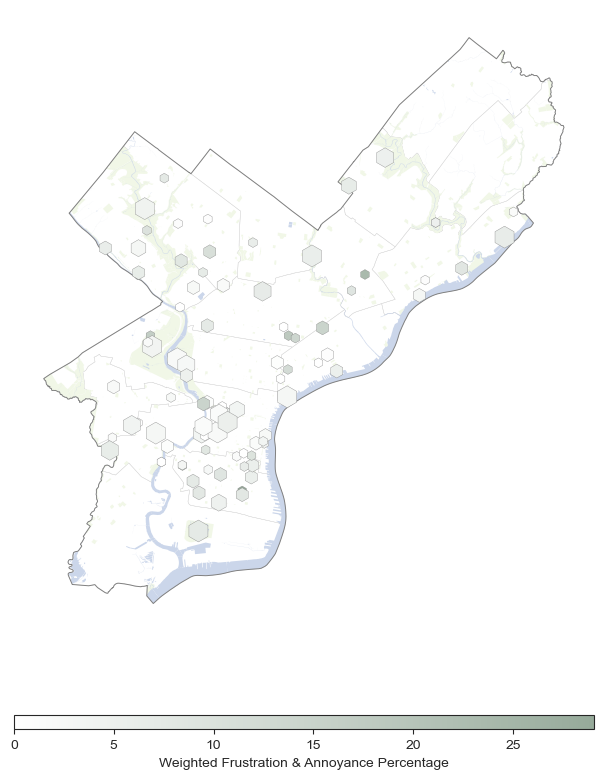

In [168]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Frustration & Annoyance_percentage_weighted'].min(), vmax=park_plot['Frustration & Annoyance_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Frustration & Annoyance_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#96AA9A']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#96AA9A']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Frustration & Annoyance Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/fa_w.jpg', format='jpg', dpi=300)

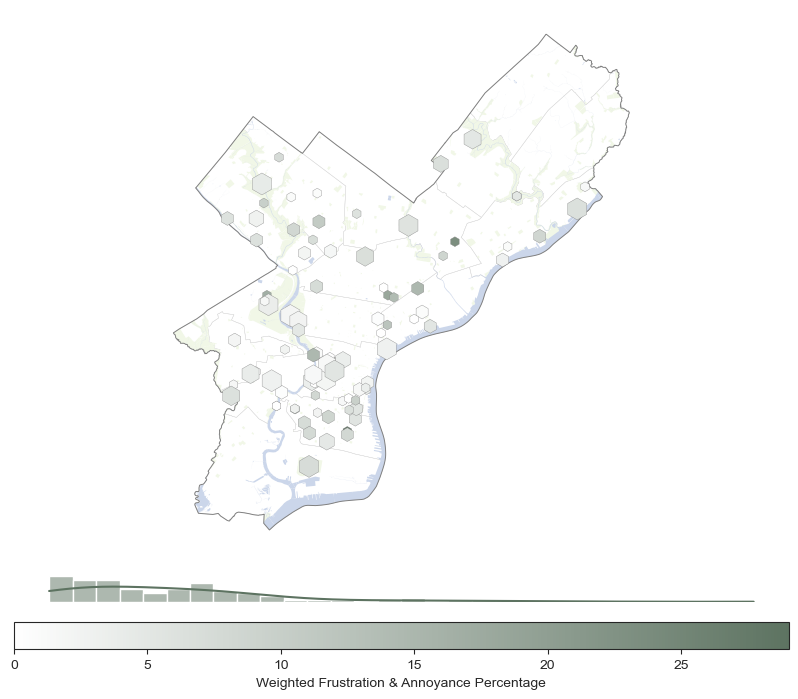

In [173]:
sns.set_style('white')

# Set up the main plot with map and color bar
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 1, height_ratios=[20, 1, 1])  # Main plot, distribution, and color bar
ax_map = fig.add_subplot(gs[0])
ax_dist = fig.add_subplot(gs[1])
ax_colorbar = fig.add_subplot(gs[2])

# Plot the map
planning_districts.plot(ax=ax_map, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax_map, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax_map, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax_map, color='none', edgecolor='grey', linewidth=0.7)

# Remove latitude and longitude labels
sns.despine(left=True, bottom=True, right=True, top=True)
ax_map.set_xlabel("")
ax_map.set_ylabel("")
ax_map.set_xticks([])
ax_map.set_yticks([])

# Normalize color map
norm = mcolors.Normalize(vmin=park_plot['Frustration & Annoyance_percentage_weighted'].min(), 
                         vmax=park_plot['Frustration & Annoyance_percentage_weighted'].max())

# Create scatter plot with hexagonal markers and scaled sizes
scatter = ax_map.scatter(
    park_plot['Long'], park_plot['Lat'],
    c=park_plot['Frustration & Annoyance_percentage_weighted'],
    s=park_plot['review_count_by_park'].apply(map_size_category),
    edgecolor='grey', linewidth=0.25, marker='h',
    cmap=LinearSegmentedColormap.from_list("custom_fna", ['#ffffff', '#5d7361']),  # Custom colors
    norm=norm
)

# Plot value distribution as a histogram in ax_dist
sns.histplot(park_plot['Frustration & Annoyance_percentage_weighted'], bins=30, kde=True, ax=ax_dist, color='#5d7361')
ax_dist.set_xlabel("")  
ax_dist.set_ylabel("")  
ax_dist.set_xticks([])  
ax_dist.set_yticks([])  
ax_dist.spines['top'].set_visible(False)
ax_dist.spines['right'].set_visible(False)
ax_dist.spines['left'].set_visible(False)

# Manually adjust the position of the histogram - not working - will do it in photoshop
plt.subplots_adjust(bottom=0, top=0.25, hspace=0)

# Color bar setup in ax_colorbar
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_fna", ['#ffffff', '#5d7361']), norm=norm)
cb = ColorbarBase(ax=ax_colorbar, cmap=sm.cmap, norm=norm, orientation='horizontal')
cb.set_label('Weighted Frustration & Annoyance Percentage')

# Adjust layout for tighter spacing if needed
plt.subplots_adjust(bottom=0.05, top=0.85, hspace=0.1)
plt.show()
fig.savefig('output_files/maps/fna_w_new.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot['Sorrow_percentage_weighted'].min(), vmax=park_plot['Sorrow_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot['Long'], park_plot['Lat'], c=park_plot['Sorrow_percentage_weighted'],
                     s=park_plot['review_count_by_park'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#5E718B']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#5E718B']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Sorrow Percentage')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/sorrow_w.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')

# Set up the main plot with map and color bar
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(3, 1, height_ratios=[20, 1, 1])  # Main plot, distribution, and color bar
ax_map = fig.add_subplot(gs[0])
ax_dist = fig.add_subplot(gs[1])
ax_colorbar = fig.add_subplot(gs[2])

# Plot the map
planning_districts.plot(ax=ax_map, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax_map, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax_map, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax_map, color='none', edgecolor='grey', linewidth=0.7)

# Remove latitude and longitude labels
sns.despine(left=True, bottom=True, right=True, top=True)
ax_map.set_xlabel("")
ax_map.set_ylabel("")
ax_map.set_xticks([])
ax_map.set_yticks([])

# Normalize color map
norm = mcolors.Normalize(vmin=park_plot['Sorrow_percentage_weighted'].min(), 
                         vmax=park_plot['Sorrow_percentage_weighted'].max())

# Create scatter plot with hexagonal markers and scaled sizes
scatter = ax_map.scatter(
    park_plot['Long'], park_plot['Lat'],
    c=park_plot['Sorrow_percentage_weighted'],
    s=park_plot['review_count_by_park'].apply(map_size_category),
    edgecolor='grey', linewidth=0.25, marker='h',
    cmap=LinearSegmentedColormap.from_list("custom_Sorrow", ['#ffffff', '#5E718B']),  # Custom colors
    norm=norm
)

# Plot value distribution as a histogram in ax_dist
sns.histplot(park_plot['Sorrow_percentage_weighted'], bins=30, kde=True, ax=ax_dist, color='#5E718B')
ax_dist.set_xlabel("")  
ax_dist.set_ylabel("")  
ax_dist.set_xticks([])  
ax_dist.set_yticks([])  
ax_dist.spines['top'].set_visible(False)
ax_dist.spines['right'].set_visible(False)
ax_dist.spines['left'].set_visible(False)

# Manually adjust the position of the histogram - not working - will do it in photoshop
plt.subplots_adjust(bottom=0, top=0.25, hspace=0)

# Color bar setup in ax_colorbar
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_Sorrow", ['#ffffff', '#5E718B']), norm=norm)
cb = ColorbarBase(ax=ax_colorbar, cmap=sm.cmap, norm=norm, orientation='horizontal')
cb.set_label('Weighted Sorrow Percentage')

# Adjust layout for tighter spacing if needed
plt.subplots_adjust(bottom=0.05, top=0.85, hspace=0.1)
plt.show()
fig.savefig('output_files/maps/sorrow_w_new.jpg', format='jpg', dpi=300)

In [ ]:
# Define the emotion columns you want to check
emotion_columns = [
    'Inspiration_percentage_weighted', 
    'Relaxation_percentage_weighted', 
    'Engagement_percentage_weighted', 
    'Discovery_percentage_weighted', 
    'Frustration & Annoyance_percentage_weighted', 
    'Sorrow_percentage_weighted'
]

# Find the top 10 parks for each emotion
top_parks_by_emotion = {}
for emotion in emotion_columns:
    top_parks = park_plot.nlargest(10, emotion)[['ParkName', emotion]]
    top_parks_by_emotion[emotion] = top_parks

# Display the results for each emotion
for emotion, top_parks in top_parks_by_emotion.items():
    print(f"Top 10 parks for {emotion}:\n", top_parks, "\n")


### *emotion in the recent one year*

In [ ]:
reviews_df.head()

In [ ]:
reviews_df['time'] = reviews_df['time'].astype(str)

# Filter the DataFrame to include only rows where 'time' starts with 2023 or 2024
reviews_df_2324 = reviews_df[reviews_df['time'].str.startswith(('2023', '2024'))]

In [ ]:
park_plot_new = reviews_df_2324.drop_duplicates(subset='ParkName')[['ParkName', 'Long', 'Lat']]

review_count_by_park_new = reviews_df_2324.groupby('ParkName').size().reset_index(name='ReviewCount')

# Merge the review count with the park_plot_new DataFrame
park_plot_new = park_plot_new.merge(review_count_by_park_new, on='ParkName', how='left')

park_plot_new.head()

In [ ]:
weighted_counts = reviews_df_2324.groupby(['ParkName', 'new_emotion']).apply(
    lambda x: (x['weights']).sum()
).unstack(fill_value=0)

# Calculate the total weights per park to normalize
total_weights_per_park_weighted = weighted_counts.sum(axis=1)

# Calculate weighted percentages
park_cluster_percentages_weighted = weighted_counts.div(total_weights_per_park_weighted, axis=0) * 100

# Rename the columns to include '_percentage'
park_cluster_percentages_weighted.columns = [f'{emotion}_percentage_weighted' for emotion in park_cluster_percentages_weighted.columns]

# Round the percentages and check the first few rows
park_emo_weighted = park_cluster_percentages_weighted.round(2)

In [ ]:
park_plot_new = park_plot_new.merge(park_emo_weighted, on='ParkName', how='left')

park_plot_new.head()

park_plot_new = gpd.GeoDataFrame(
    park_plot_new, 
    geometry=gpd.points_from_xy(park_plot_new['Long'], park_plot_new['Lat'])
)

# Set the original CRS for the GeoDataFrame
park_plot_new.set_crs('EPSG:4326', inplace=True)

In [ ]:
sorted_park_plot_new = park_plot_new.sort_values(by=['Frustration & Annoyance_percentage_weighted_x'], ascending=False)

sorted_park_plot_new.head()

In [ ]:
def map_size_category(x):
    breaks = [0, 100, 250, 500, 1000, 2500, max(park_plot_new['ReviewCount'])]  
    sizes = [50, 100, 150, 200, 250]
    for i, break_point in enumerate(breaks):
        if x <= break_point:
            return sizes[i]
    return sizes[-1]

In [ ]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Discovery_percentage_weighted'].min(), vmax=park_plot_new['Discovery_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Discovery_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#CF7041']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#CF7041']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Discovery Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/disc_w_2324.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Relaxation_percentage_weighted'].min(), vmax=park_plot_new['Relaxation_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Relaxation_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#E5C5BD']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#E5C5BD']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Relaxation Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/rex_w_2324.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Inspiration_percentage_weighted'].min(), vmax=park_plot_new['Inspiration_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Inspiration_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#E2A55E']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#E2A55E']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Inspiration Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/insp_w_2324.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Engagement_percentage_weighted'].min(), vmax=park_plot_new['Engagement_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Engagement_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#B4BFC5']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#B4BFC5']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Engagement Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/eng_w_2324.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Frustration & Annoyance_percentage_weighted'].min(), vmax=park_plot_new['Frustration & Annoyance_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Frustration & Annoyance_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#96AA9A']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#96AA9A']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Frustration & Annoyance Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/fa_w_2324.jpg', format='jpg', dpi=300)

In [ ]:
sns.set_style('white')


fig, ax = plt.subplots(1, 1, figsize=(8, 10))
planning_districts.plot(ax=ax, color='none', edgecolor='lightgrey', linewidth=0.25)
ppr.plot(ax=ax, color='#f1f7e7', edgecolor='none', linewidth=0)
hydro.plot(ax=ax, color='#cbd6ea', edgecolor='none', linewidth=0.5)
city_limits.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.7)

norm = mcolors.Normalize(vmin=park_plot_new['Sorrow_percentage_weighted'].min(), vmax=park_plot_new['Sorrow_percentage_weighted'].max())

# Create a scatter plot with hexagonal markers and scaled sizes
scatter = ax.scatter(park_plot_new['Long'], park_plot_new['Lat'], c=park_plot_new['Sorrow_percentage_weighted'],
                     s=park_plot_new['ReviewCount'].apply(map_size_category), 
                     edgecolor='grey', linewidth=0.25, marker='h',
                     cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff','#5E718B']))

# Color bar for sentiment
sm = plt.cm.ScalarMappable(cmap=LinearSegmentedColormap.from_list("custom_sorrow", ['#ffffff', '#5E718B']), norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=40)
cb.set_label('Weighted Sorrow Percentage since 2023')
cb.ax.set_position([0.4, 0.05, 0.2, 0.25]) 

ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True, right=True, top=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(False)
plt.subplots_adjust(bottom=0.05, right=0.85)
plt.show()
fig.savefig('output_files/maps/sorrow_w_2324.jpg', format='jpg', dpi=300)

## Keywords by Emotions

In [ ]:
inspiration_df = reviews_df[reviews_df['new_emotion'] == 'Inspiration']
discovery_df = reviews_df[reviews_df['new_emotion'] == 'Discovery']
relexation_df = reviews_df[reviews_df['new_emotion'] == 'Relaxation']
engagement_df = reviews_df[reviews_df['new_emotion'] == 'Engagement']
sorrow_df = reviews_df[reviews_df['new_emotion'] == 'Sorrow']
frustration_df = reviews_df[reviews_df['new_emotion'] == 'Frustration & Annoyance']

In [ ]:
len(frustration_df)

In [ ]:
!pip install langdetect

### *Word Frequenty (end up with only LDA MAYBE)*

In [ ]:
from collections import Counter
import string
import nltk
from langdetect import detect, LangDetectException

nltk.download('stopwords')
from nltk.corpus import stopwords


def normalize_text(word):
    # Manually remove common plural and tense endings
    if word.endswith('s'):
        word = word[:-1]
    if word.endswith('es'):
        word = word[:-2]
    if word.endswith('ed'):
        word = word[:-2]
    if word.endswith('ing'):
        word = word[:-3]
    return word

def content_analysis(df, text_column, emotion_label, words_to_drop):
    # Convert text to lowercase and remove punctuation
    words = df[text_column].str.lower().replace(f'[{string.punctuation}]', '', regex=True).str.split()

    # Flatten list of words and normalize
    words_flat = [normalize_text(word) for sublist in words for word in sublist if word.strip()]

    # Remove stopwords and unwanted words
    stop_words = set(stopwords.words('english'))
    words_no_stop = [word for word in words_flat if word not in stop_words and word not in words_to_drop]

    # Count the frequency of each word
    word_counts = Counter(words_no_stop)

    # Convert to a DataFrame
    words_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

    ax = words_df.head(10).set_index('word').plot(
        kind='barh',
        color='#9BC2D8',
        figsize=(10, 8),
        fontsize=14,
        legend=False
    )
    
    # Add value labels to each bar
    ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')
    
    # Hide the x-axis
    plt.gca().xaxis.set_visible(False)
    
    # Customize the appearance
    plt.gca().invert_yaxis()  # Invert the y-axis
    plt.ylabel('')
    sns.despine(left=True, bottom=True, right=True, top=True) 
    plt.savefig(f'output_files/charts/Word_Frequency_for_{emotion_label.capitalize()}_Reviews.jpg', format='jpg', dpi=300)

    plt.show() 

    return words_df

In [ ]:
words_to_drop = ['park', 'place', 'nice', 'nan','s','*','’','good','great','love','fun','lol','go','little','littl',
                 'people','peopl','one', 'much', 'lot','citi','philly','philli','philadelphia','dont','see', 'take', 
                 'city', 'get', 'area','like','many','went','always','best','well','would','really','sure','de',
                'going','lots','im','bad', 'para', 'loved', 'leo','upon','time','thanks','thank','en','la','un','muy','lugar','es', 'wa','ha',
                'thi','ne','u', 'nan','always','even','lo','e','first','el', 'que', 'con','ok']


inspiration_word_counts = content_analysis(inspiration_df, 'review_text', 'Inspiration', words_to_drop)
discovery_word_counts = content_analysis(discovery_df, 'review_text', 'Discovery', words_to_drop)
relexation_word_counts = content_analysis(relexation_df, 'review_text', 'Relexation', words_to_drop)
engagement_word_counts = content_analysis(engagement_df, 'review_text', 'Engagement', words_to_drop)
sorrow_word_counts = content_analysis(sorrow_df, 'review_text', 'Sorrow', words_to_drop)
frustration_word_counts = content_analysis(frustration_df, 'review_text', 'Frustration & Annoyance', words_to_drop)

### *LDA*

In [ ]:
! pip install gensim

In [ ]:
from collections import Counter
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import RegexpTokenizer
import nltk

In [ ]:
# Ensure necessary NLTK resources are downloaded
nltk.download('stopwords')

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "error"  # Handles short texts or detection errors

def perform_lda_topic_modeling(df, text_column, num_topics, num_words, words_to_drop):
    tokenizer = RegexpTokenizer(r'\w+')
    p_stemmer = PorterStemmer()

    # Create a list of stopwords and add custom words to drop
    stop_words = set(stopwords.words('english')) | set(words_to_drop)

    # List for tokenized documents in loop
    texts = []

    # Filter non-English reviews first
    df['language'] = df[text_column].apply(detect_language)
    df = df[df['language'] == 'en']  # Keeps only English-language texts

    # Loop through document list
    for i in df[text_column]:
        # Lowercase and tokenize document
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)

        # Remove stop words and unwanted words
        stopped_tokens = [i for i in tokens if i not in stop_words]

        # Stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

        # Add tokens to list
        texts.append(stemmed_tokens)

    # Turn our tokenized documents into a id <-> term dictionary
    dictionary = Dictionary(texts)

    # Convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Generate LDA model
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    return ldamodel

def format_lda_results(ldamodel, num_topics, num_words):
    main_topics = {}
    for i in range(num_topics):
        words = ldamodel.show_topic(i, num_words)
        topic_words = ', '.join([word for word, prop in words])
        main_topics[f'Topic {i}'] = topic_words

    # Convert dictionary to DataFrame for nicer formatting
    topics_df = pd.DataFrame(list(main_topics.items()), columns=['Topic', 'Words'])
    return topics_df

def df_to_image(data, filename):
    fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size as needed
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=data.values, colLabels=data.columns, loc='center', cellLoc='center', colColours=["#B4BFC5"]*data.shape[1])
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)
    print(f"Table saved as {filename}")

def plot_lda_topics(ldamodel, num_topics, num_words):
    for i in range(num_topics):
        plt.figure(figsize=(10, 2))
        words, props = zip(*ldamodel.show_topic(i, num_words))
        plt.bar(words, props, color='skyblue')
        plt.title(f'Topic {i}')
        plt.xticks(rotation=30)
        plt.ylabel('Probability')
        plt.tight_layout()
        filename = f'topic_{i}_distribution.jpg'
        plt.savefig(filename, dpi=300)  # Save each topic as an image
        plt.close()
        print(f"Topic {i} distribution saved as {filename}")

In [ ]:
words_to_drop = ['park', 'place', 'nice', 'nan','s','*','’','good','great','love','fun','lol','go','little','littl',
                 'people','peopl','one', 'much', 'lot','citi','sad','philly','philli','philadelphia','dont','see', 'take', 
                 'city', 'get', 'area','like','many','went','always','best','well','would','really','sure','de',
                'going','hang','lots','im','bad','wow', 'en','in','para', 'la','un','lugar','muy','el','es', 'que', 'lo',
                 'ok','n','con','bonito','parqu','hermoso','st','lindo','lo', 'para', 'loved', 'leo','upon','time','thanks','thank','en','la','un','muy','lugar','es', 'wa','ha',
                'thi','ne','u', 'nan','always','even','lo','e','first','us', 'aaron','jhona','still']



In [ ]:
inspiration_LDA = perform_lda_topic_modeling(inspiration_df, 'review_text', num_topics=4, num_words=5, words_to_drop=words_to_drop)


In [ ]:
inspiration_df2 = format_lda_results(inspiration_LDA, num_topics=4, num_words=5)

df_to_image(inspiration_df2, 'output_files/charts/lda_inspiration_table.jpg')

plot_lda_topics(inspiration_LDA, num_topics=4, num_words=5)

In [ ]:
discovery_LDA = perform_lda_topic_modeling(discovery_df, 'review_text', num_topics=4, num_words=6, words_to_drop=words_to_drop)


In [ ]:
discovery_df2 = format_lda_results(discovery_LDA, num_topics=4, num_words=5)

df_to_image(discovery_df2, 'output_files/charts/lda_discovery_table.jpg')

plot_lda_topics(discovery_LDA, num_topics=4, num_words=5)

In [ ]:
relexation_LDA = perform_lda_topic_modeling(relexation_df, 'review_text', num_topics=4, num_words=6, words_to_drop=words_to_drop)


In [ ]:
relexation_df2 = format_lda_results(relexation_LDA, num_topics=4, num_words=5)

df_to_image(relexation_df2, 'output_files/charts/lda_relexation_table.jpg')

plot_lda_topics(relexation_LDA, num_topics=4, num_words=5)

In [ ]:
engagement_LDA = perform_lda_topic_modeling(engagement_df, 'review_text', num_topics=4, num_words=6, words_to_drop=words_to_drop)


In [ ]:
engagement_df2 = format_lda_results(engagement_LDA, num_topics=4, num_words=5)

df_to_image(engagement_df2, 'output_files/charts/lda_engagement_table.jpg')

plot_lda_topics(engagement_LDA, num_topics=4, num_words=5)

In [ ]:
sorrow_LDA = perform_lda_topic_modeling(sorrow_df, 'review_text', num_topics=4, num_words=5, words_to_drop=words_to_drop)


In [ ]:
sorrow_df2 = format_lda_results(sorrow_LDA, num_topics=4, num_words=5)

df_to_image(sorrow_df2, 'output_files/charts/lda_sorrow_table.jpg')

plot_lda_topics(sorrow_LDA, num_topics=4, num_words=5)

In [ ]:
frustration_LDA = perform_lda_topic_modeling(frustration_df, 'review_text', num_topics=4, num_words=5, words_to_drop=words_to_drop)

In [ ]:
frustration_df2 = format_lda_results(frustration_LDA, num_topics=4, num_words=5)

df_to_image(frustration_df2, 'output_files/charts/lda_frustration_table.jpg')

plot_lda_topics(frustration_LDA, num_topics=4, num_words=5)